In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sl
import importlib
from database import db_constants, db_op
# Inline matplotlib (keep charts in this notebook)
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import init
from wine_stat import freq, vis, common_stat
import statsmodels
from data_cleaning.text_filter import TextFilter
from pyecharts.charts import Map
from pyecharts import options as opts
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mishar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#setup database
cur, con = init.init()

#print summary info of table
wine_init_table = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME)
print(wine_init_table.columns)
print(wine_init_table)

*************
Null info for table with name:  temp_wine_data
 - The total number of rows of this table is:  129971 rows
 - The number of nulls in each column is given by:  {'country': 63, 'description': 0, 'designation': 37465, 'points': 0, 'price': 8996, 'province': 63, 'region_1': 21247, 'region_2': 79460, 'taster_name': 26244, 'taster_twitter_handle': 31213, 'title': 0, 'variety': 1, 'winery': 0}
 - The percentage of nulls in each column (rounded to two decimal places) is given by:  {'country': 0.05, 'description': 0.0, 'designation': 28.83, 'points': 0.0, 'price': 6.92, 'province': 0.05, 'region_1': 16.35, 'region_2': 61.14, 'taster_name': 20.19, 'taster_twitter_handle': 24.02, 'title': 0.0, 'variety': 0.0, 'winery': 0.0}
 - The number of rows with no null entries is:  22387 rows
 - The percentage of rows in the table with no null entries is:  17.22%
*************
Based on the null info for out initial dataset, we will drop rows with nulls for the following columns:
     - country,

In [3]:
#initialize frequency tables
init.set_freq_tables(testing=False)
init.get_top_ns_tables(cur=cur, con=con)

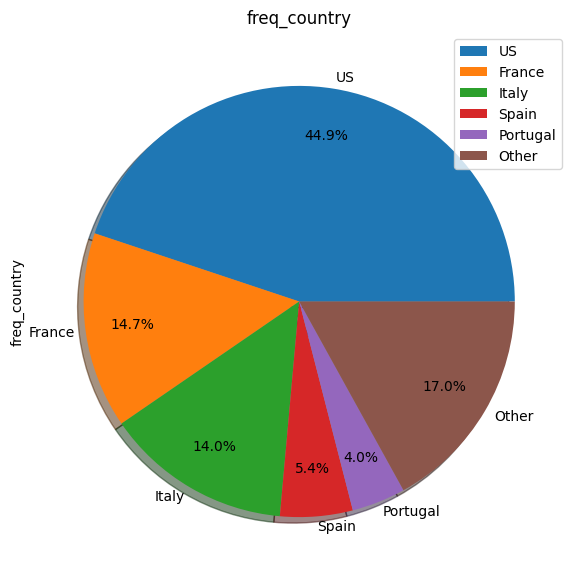

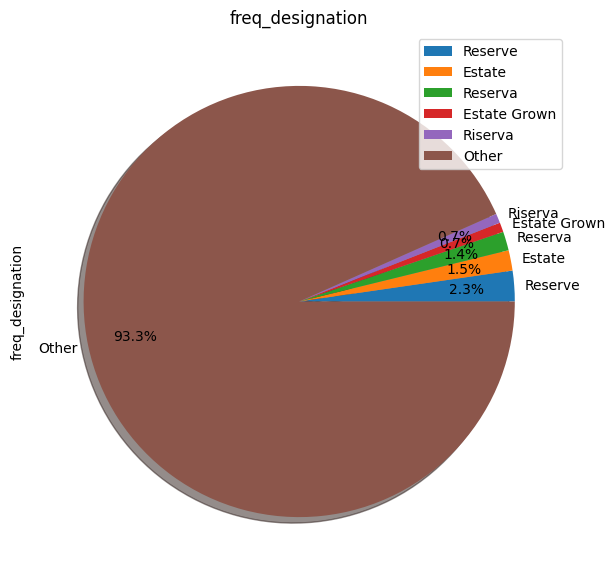

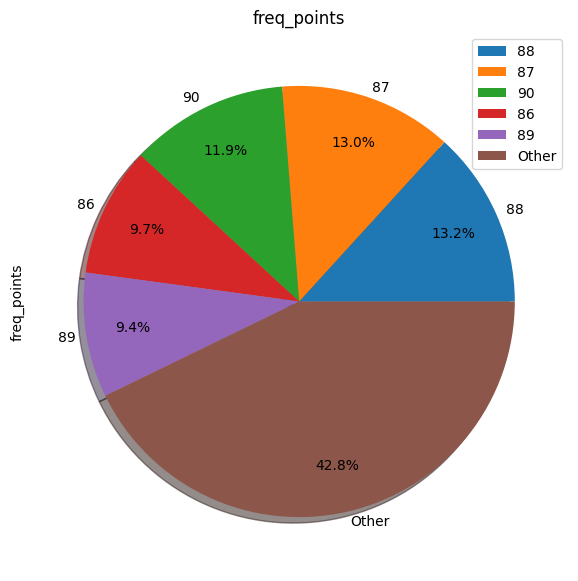

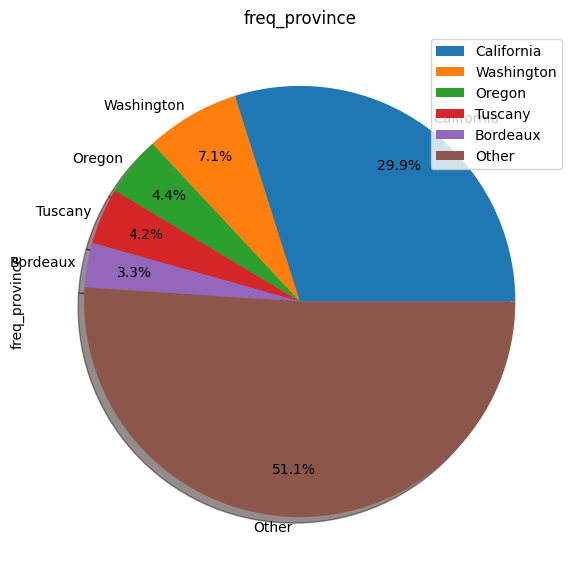

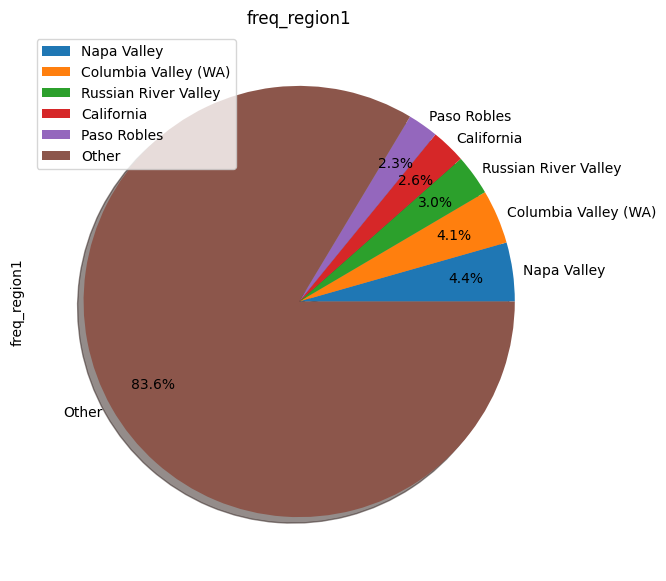

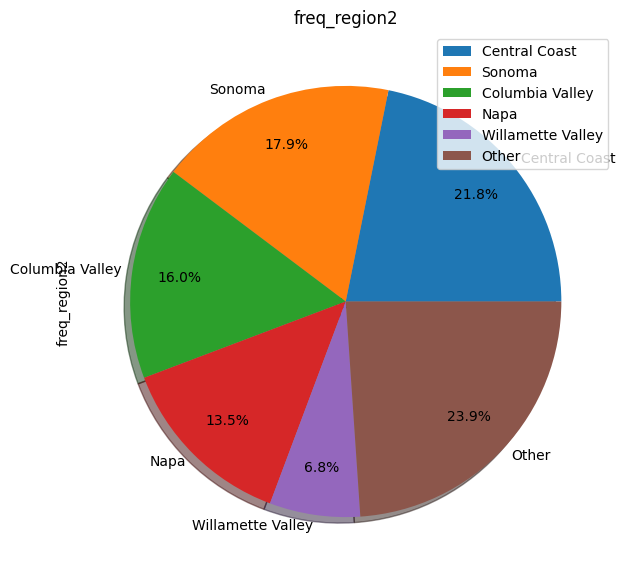

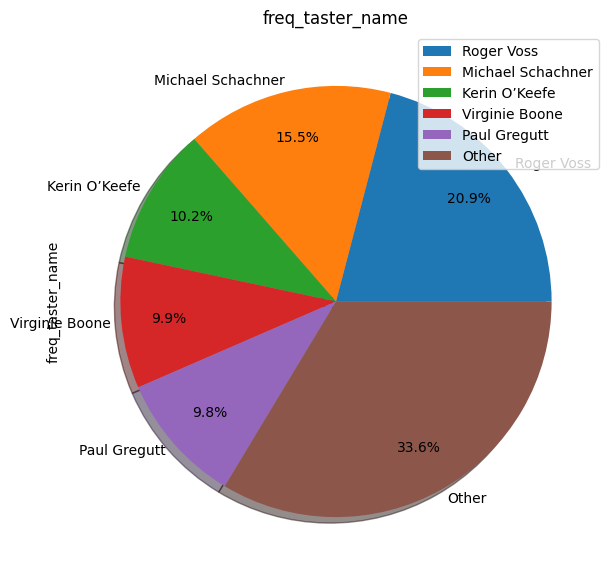

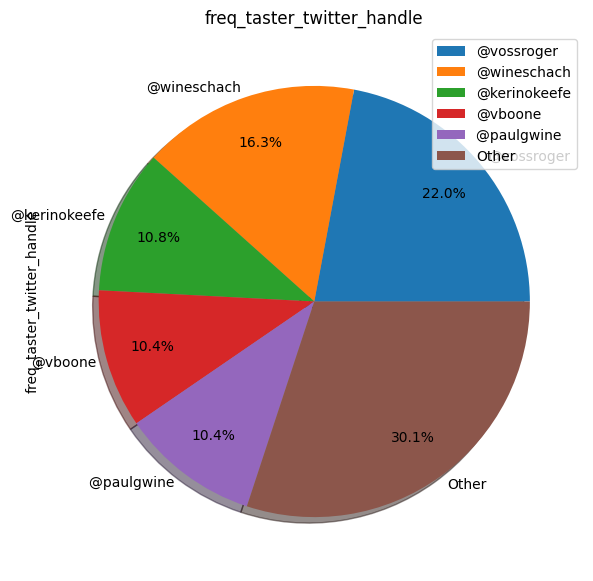

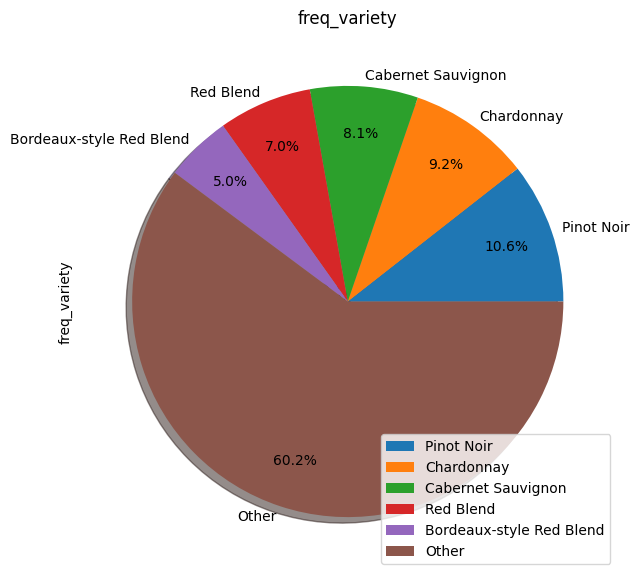

In [4]:
vis.plot_pie_charts_all_top_n_freq_tables(cur, con, freq.glbl_top_n_freq_schemas)

In [5]:
# get basic stats of price (produces corresponding tables)
factors_to_group_by = ['country', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'variety', 'winery']
for factor in factors_to_group_by:
  #  - single level grouping for price 
  common_stat.get_basic_stats_of_col1_grouped_by_cols(cur, con, 'price', [factor])

# get basic stats of points (produces corresponding tables)
for factor in factors_to_group_by:
  #  - single level grouping for price 
  common_stat.get_basic_stats_of_col1_grouped_by_cols(cur, con, 'points', [factor])

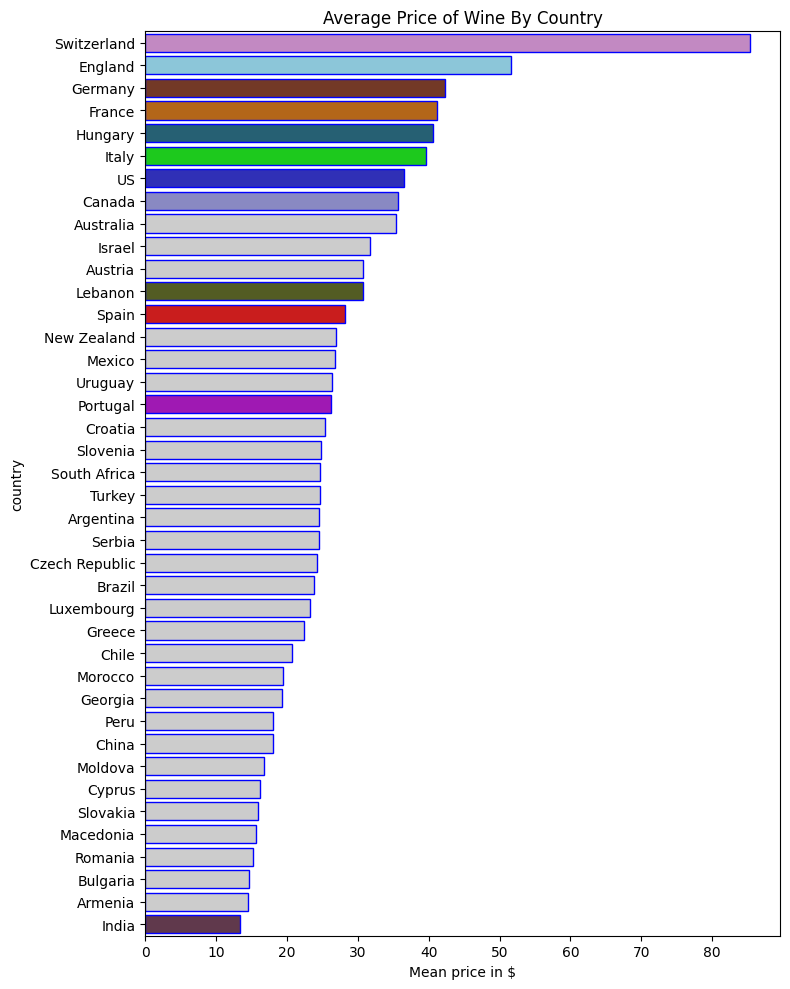

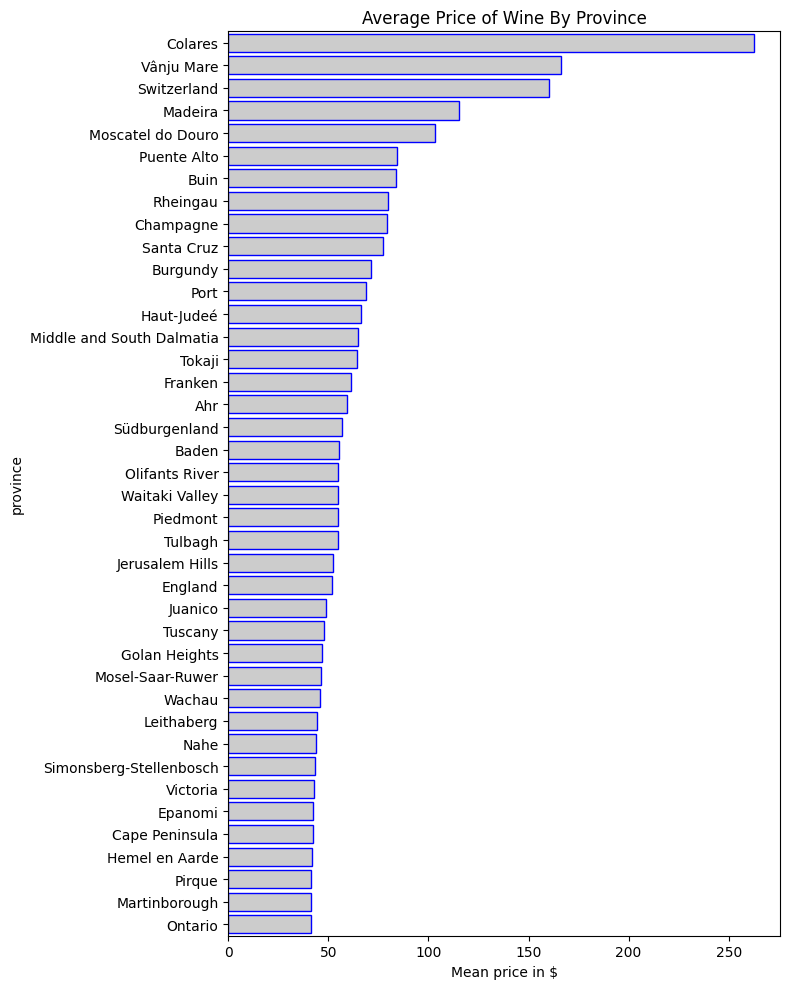

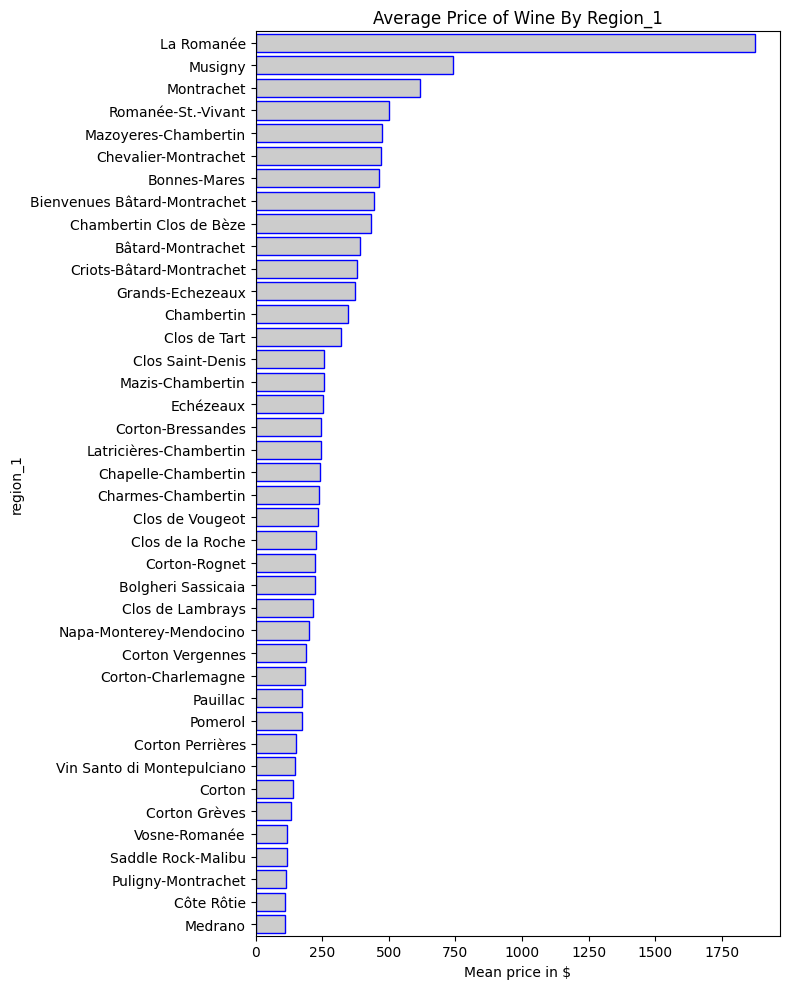

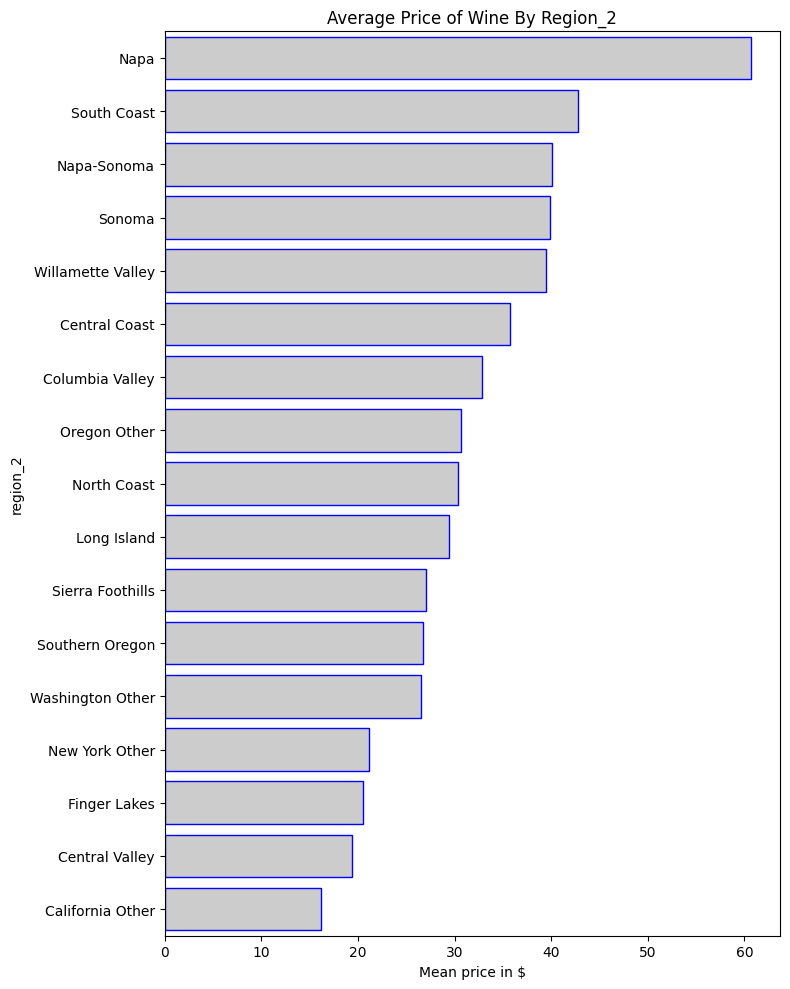

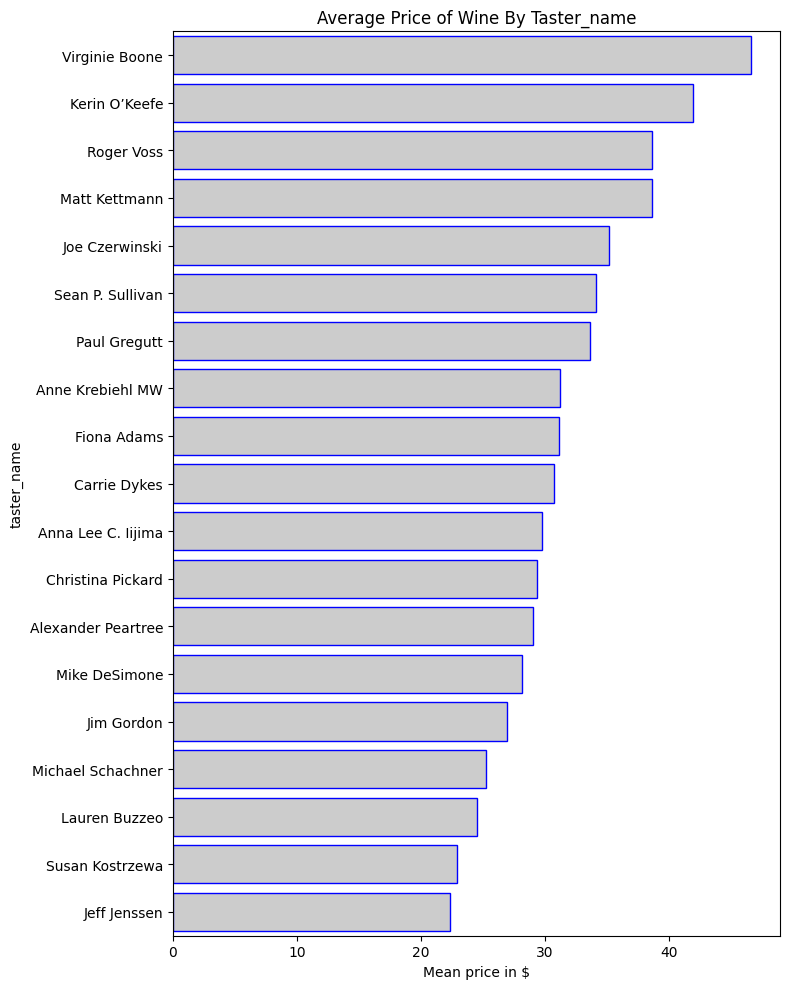

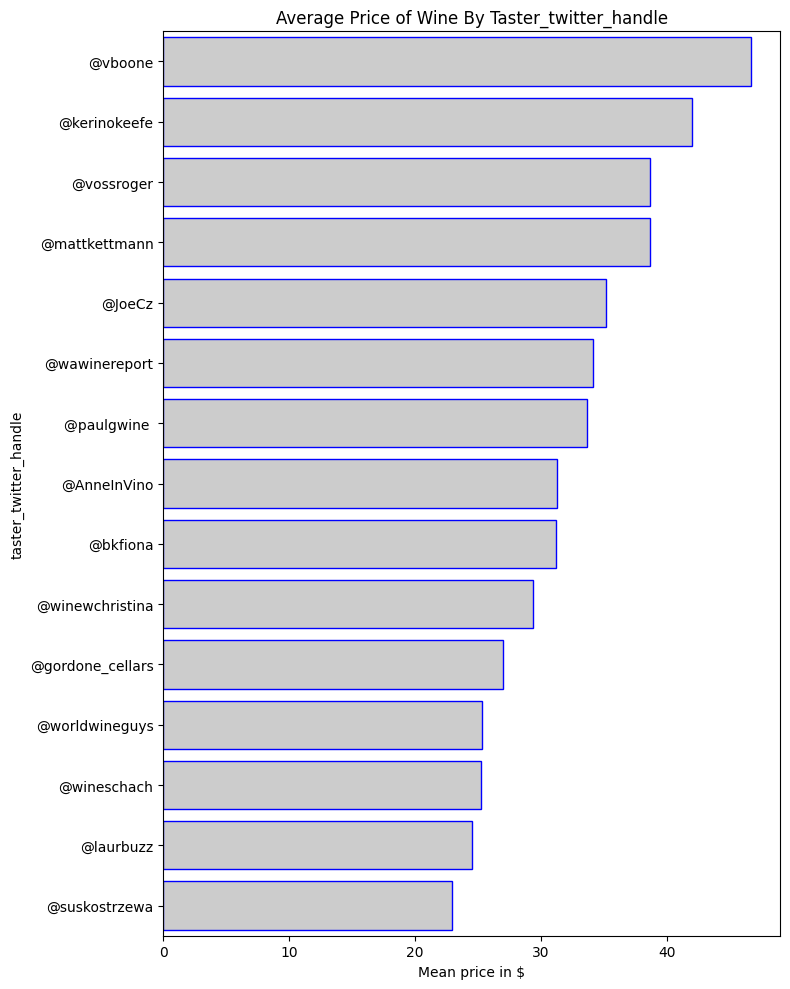

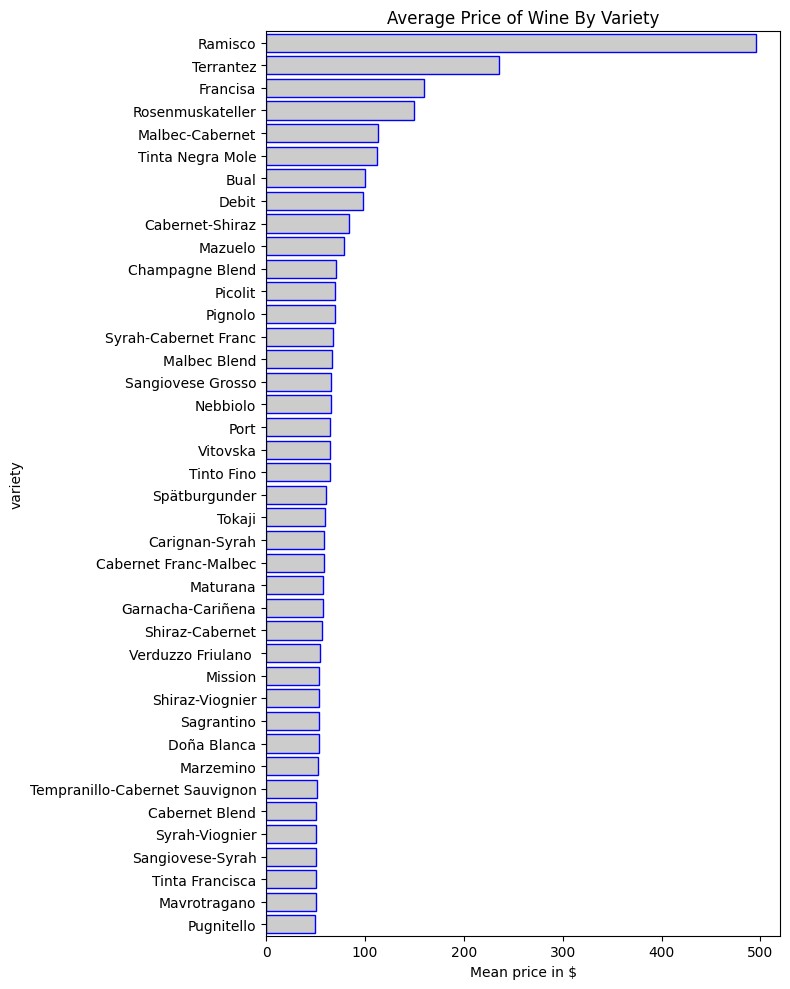

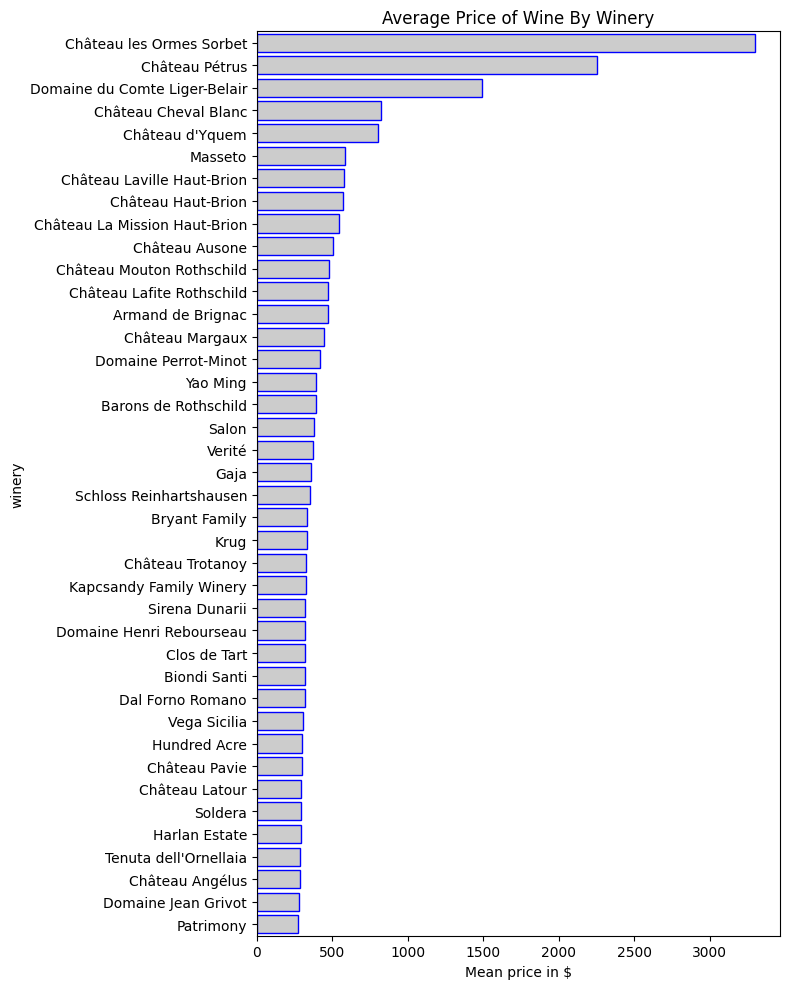

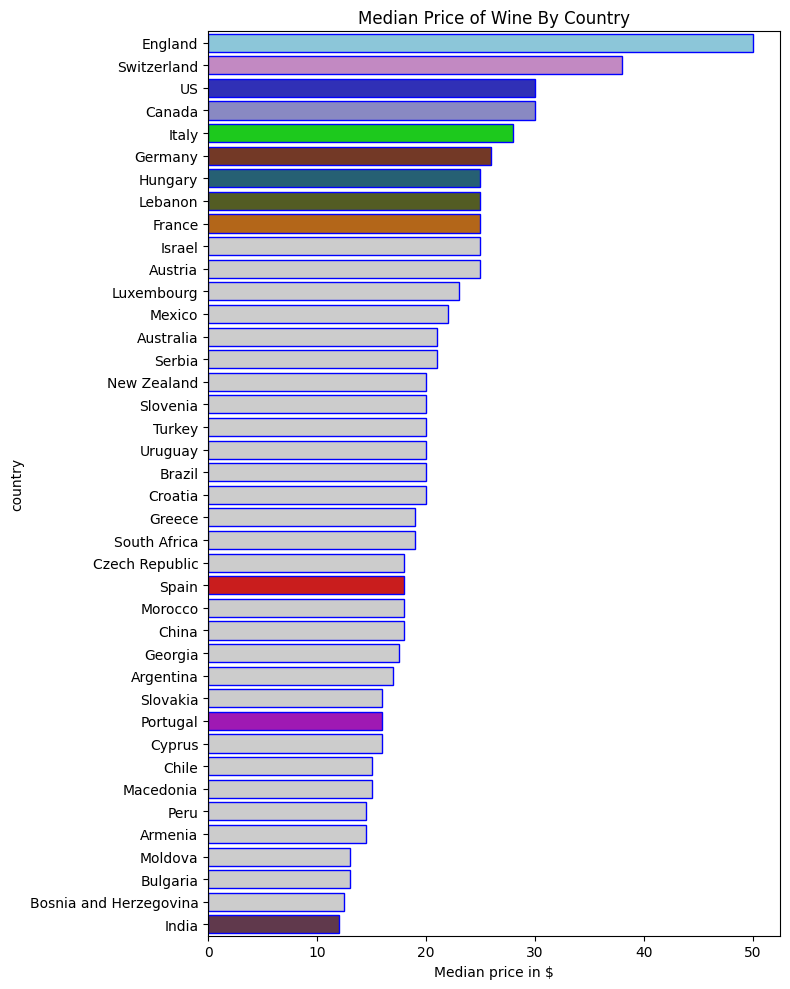

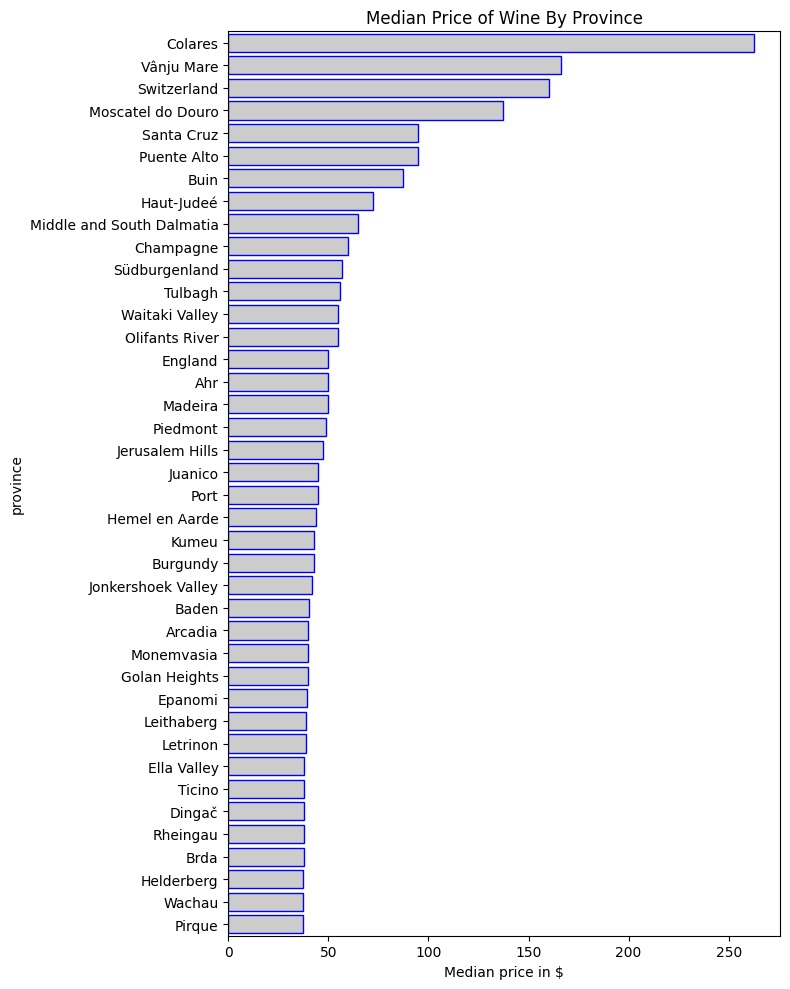

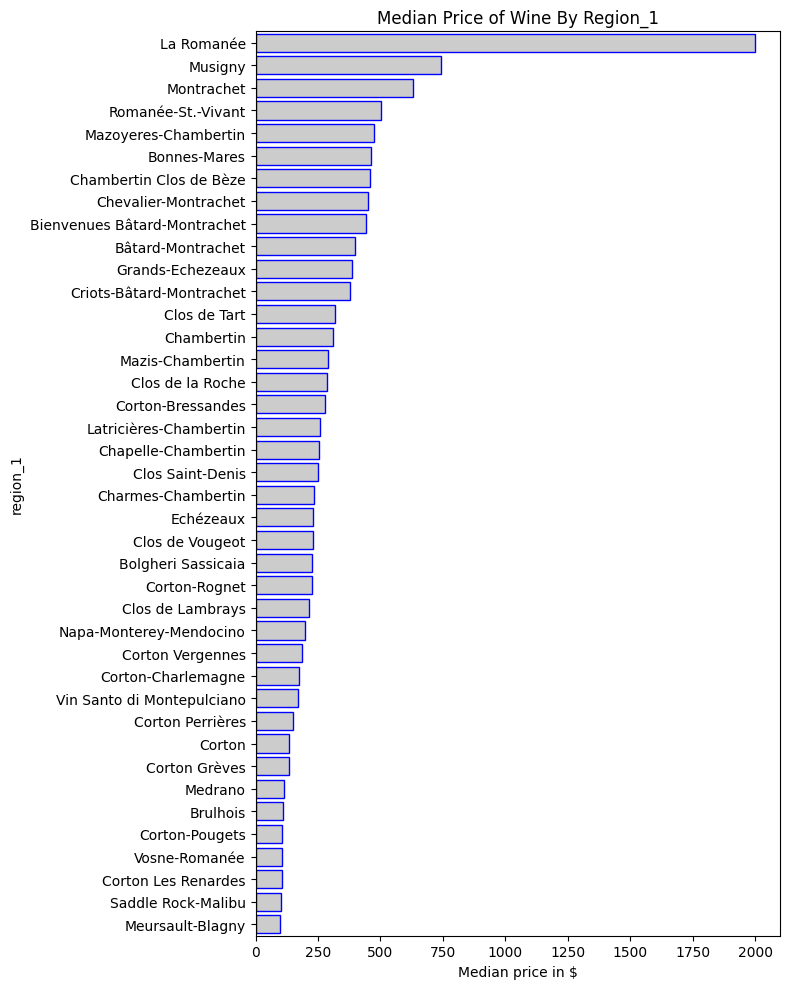

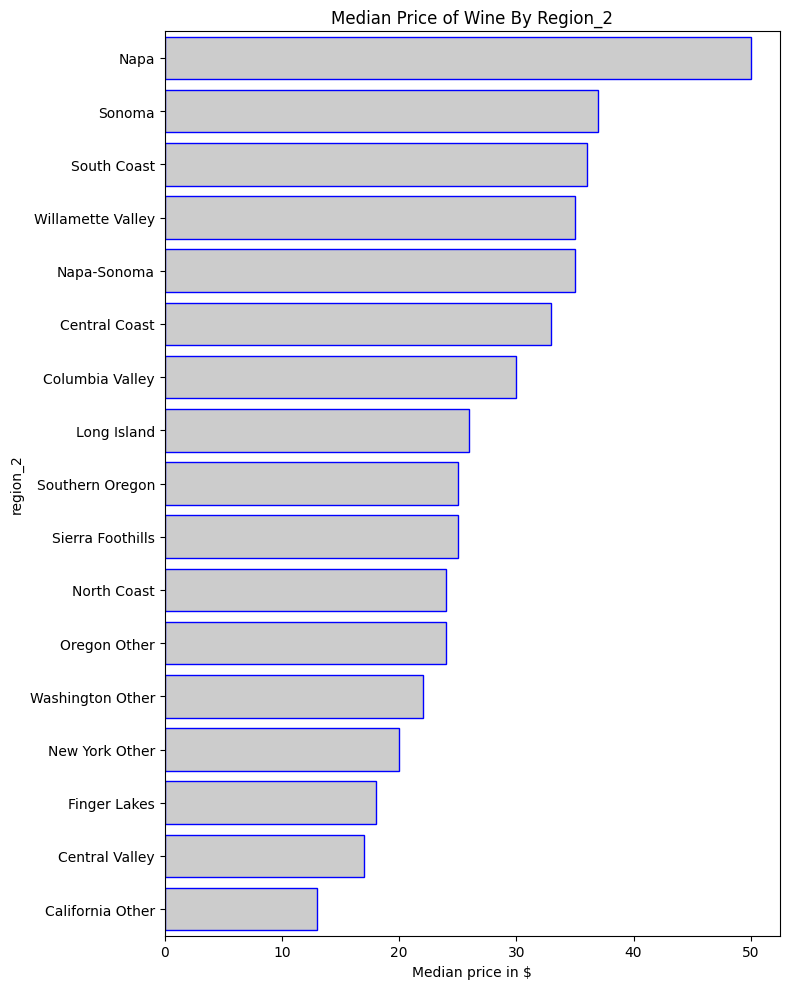

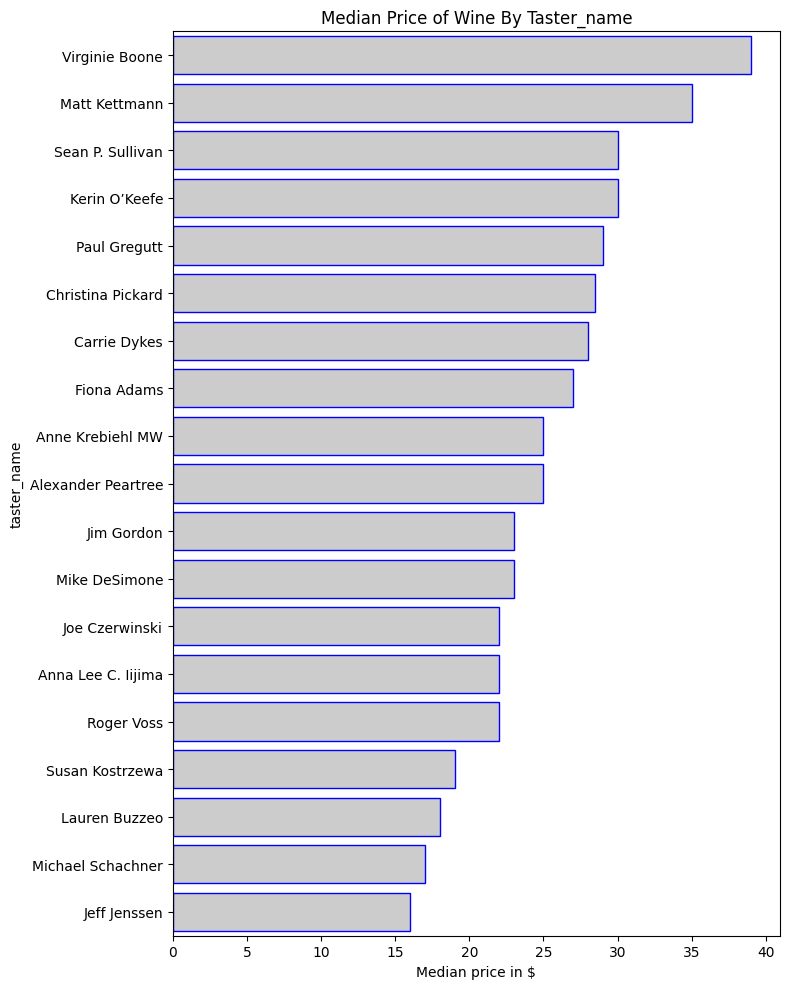

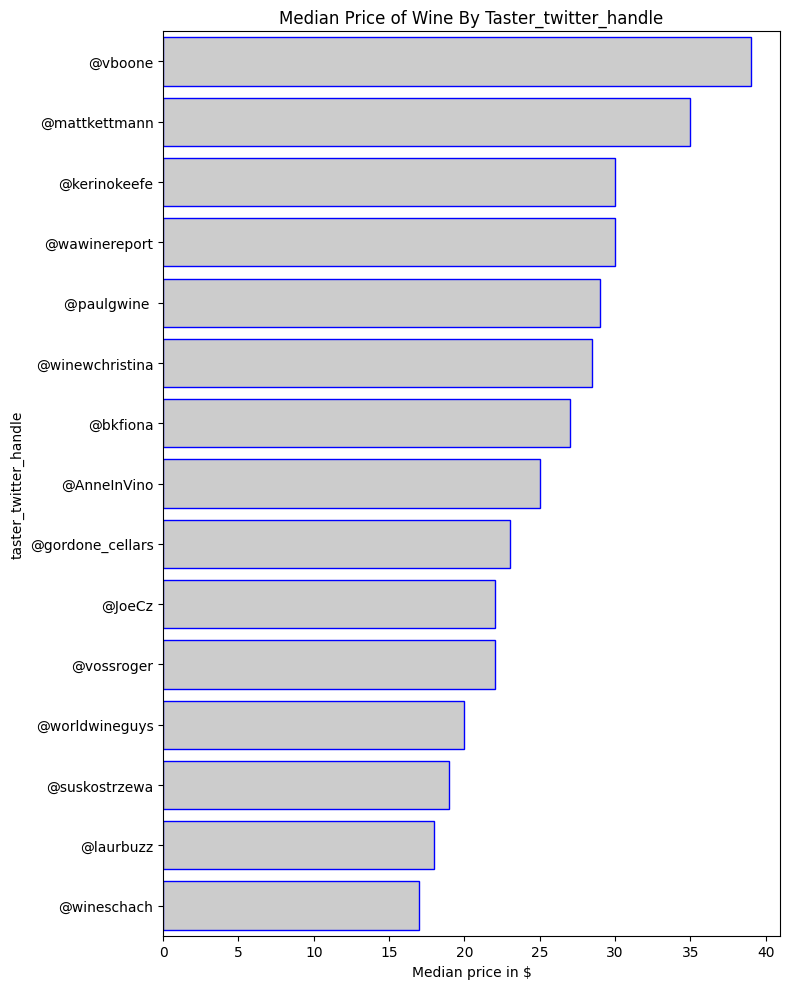

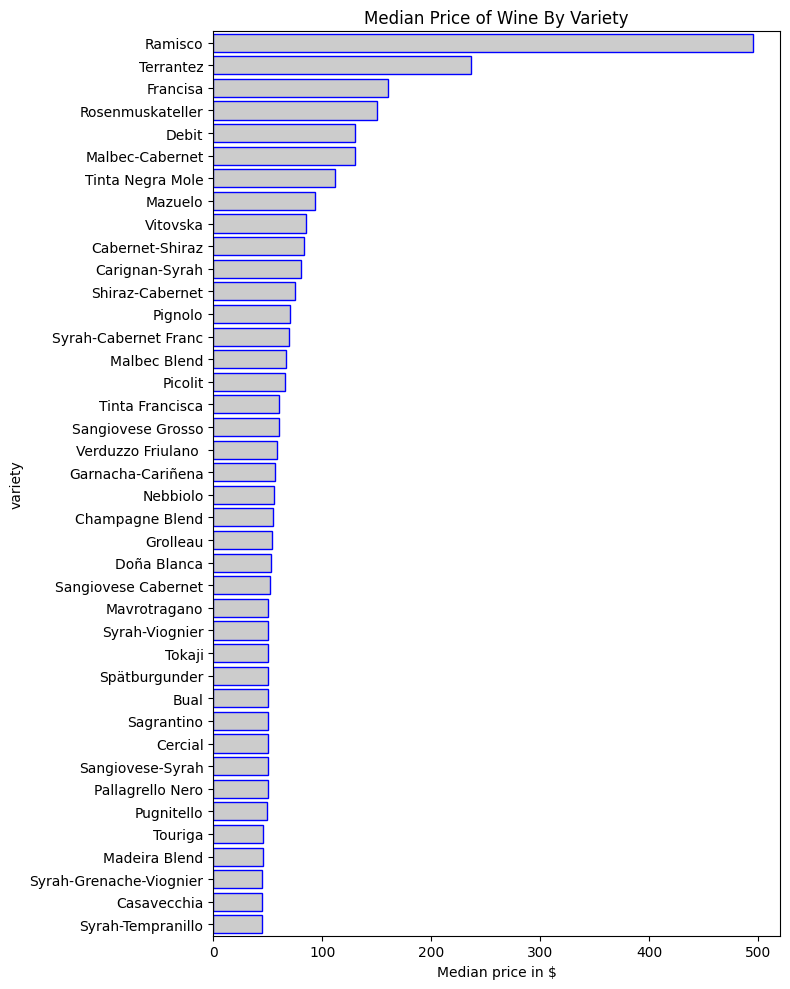

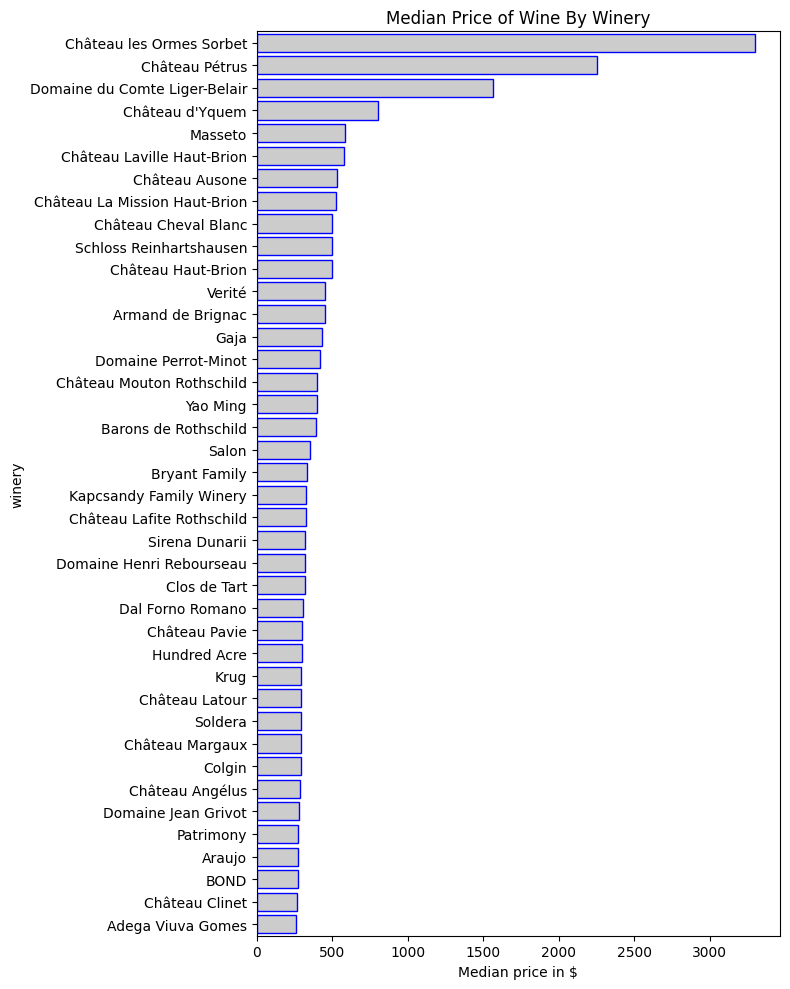

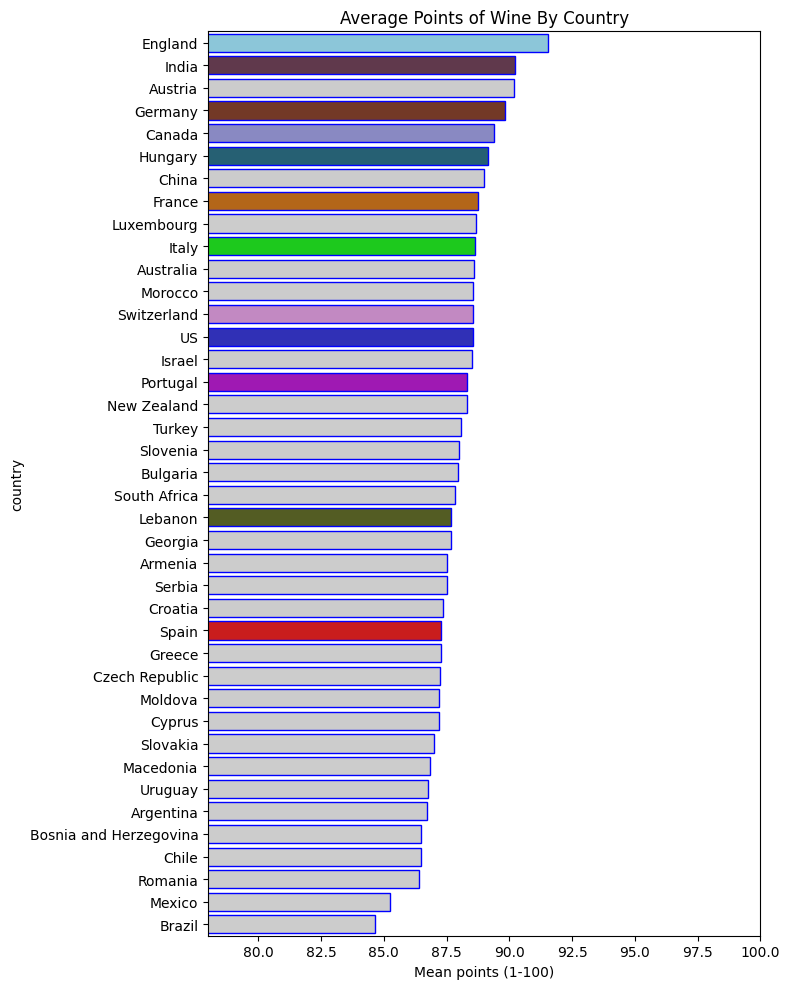

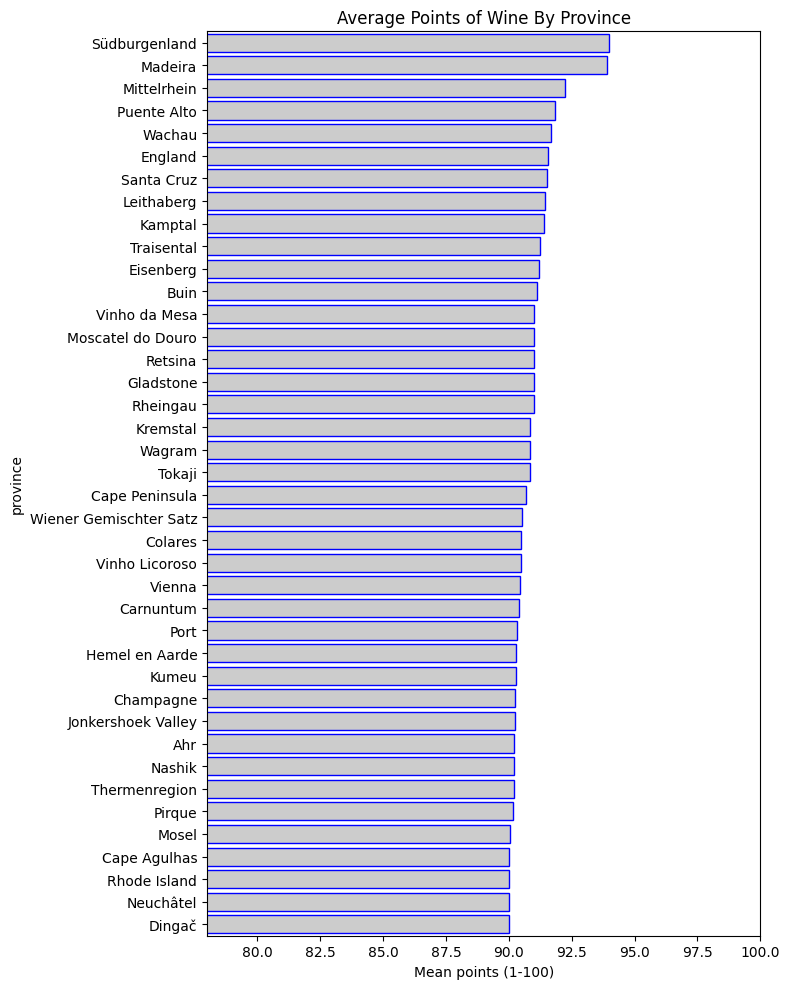

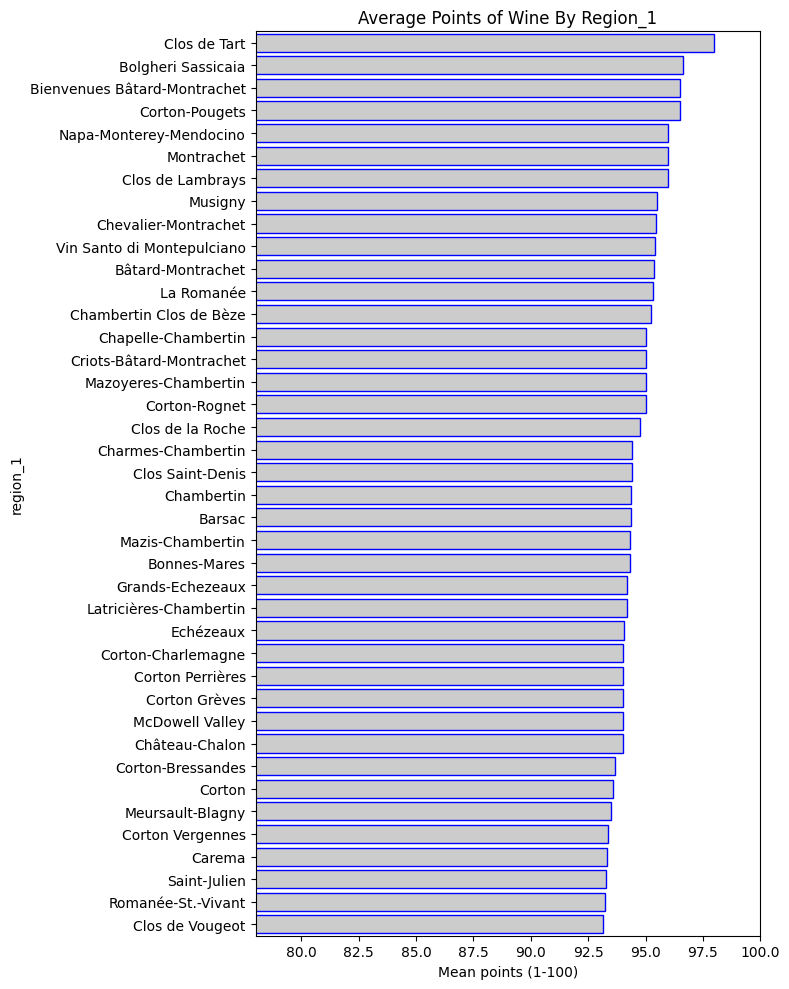

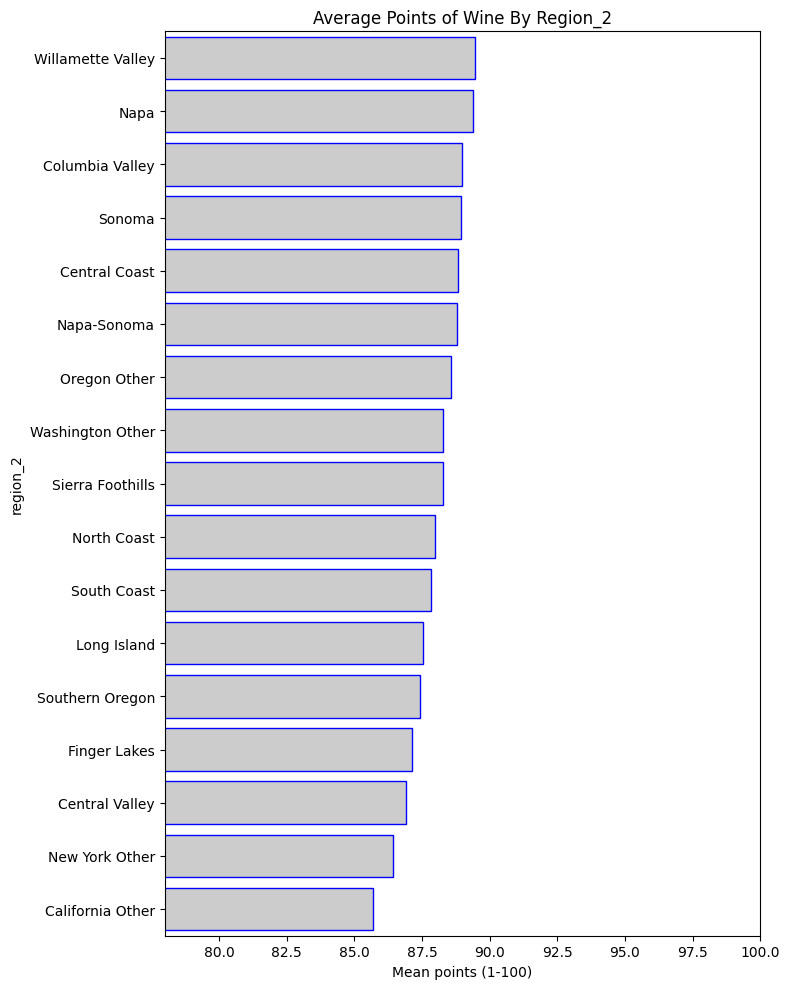

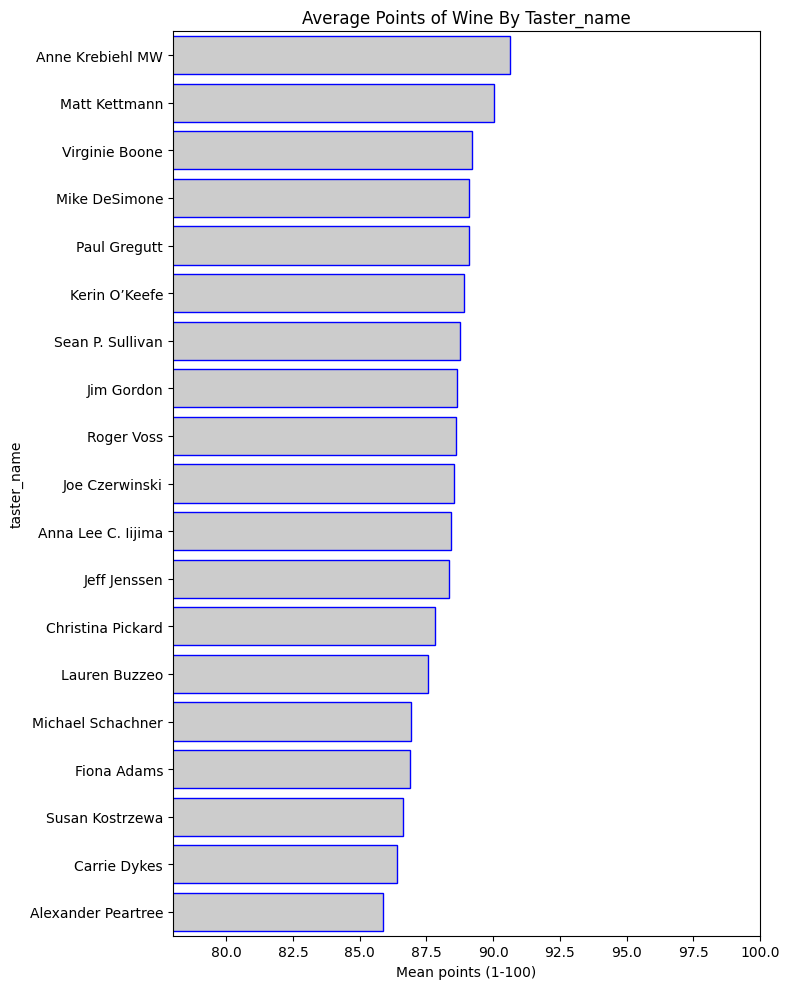

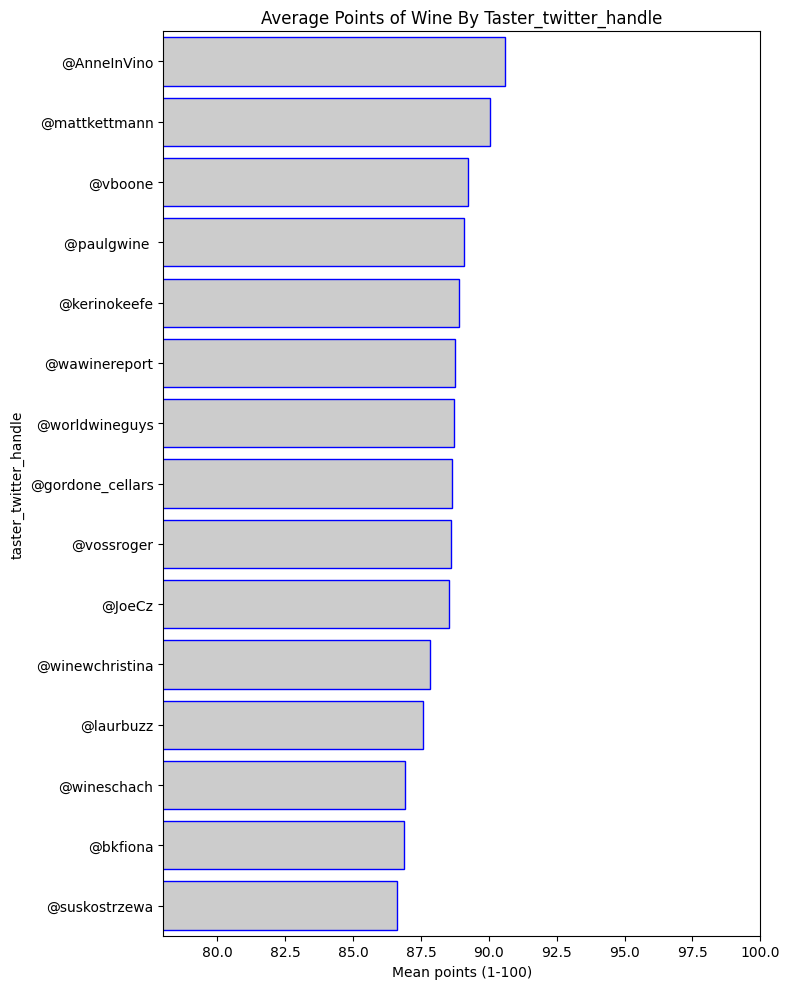

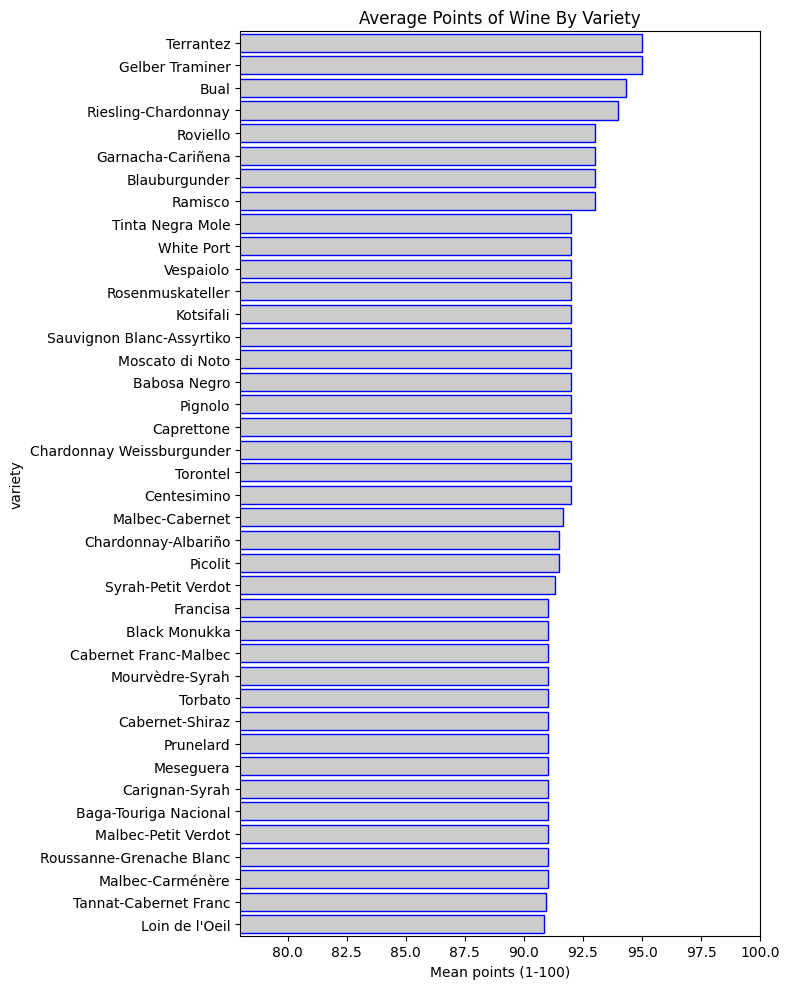

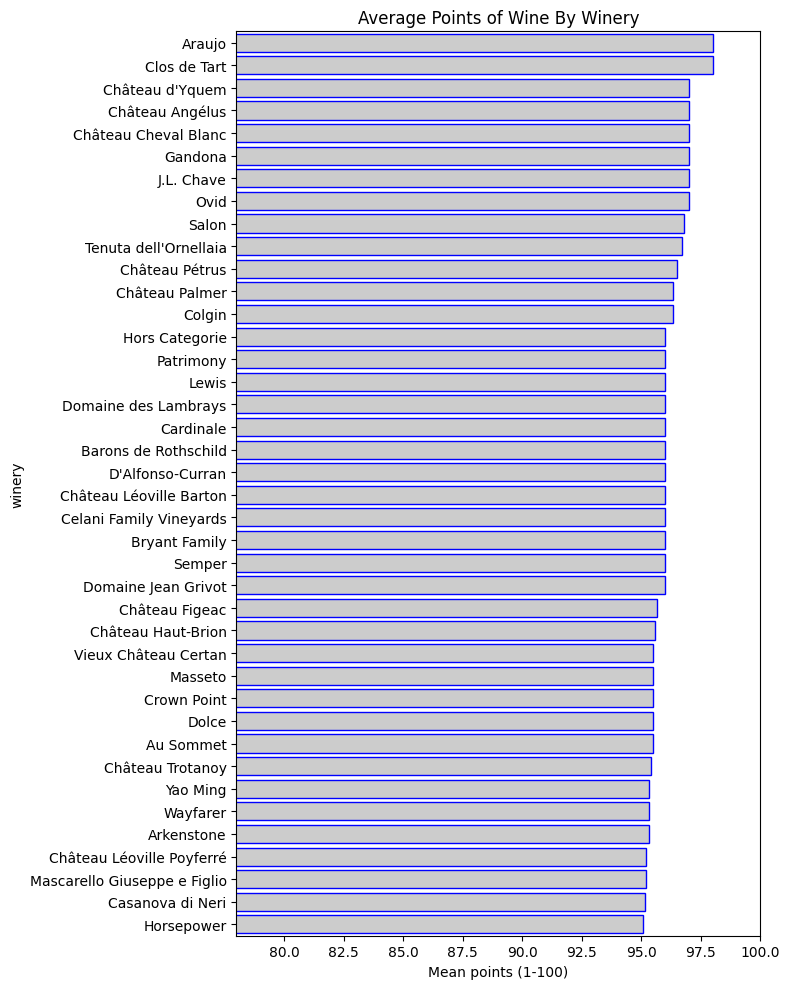

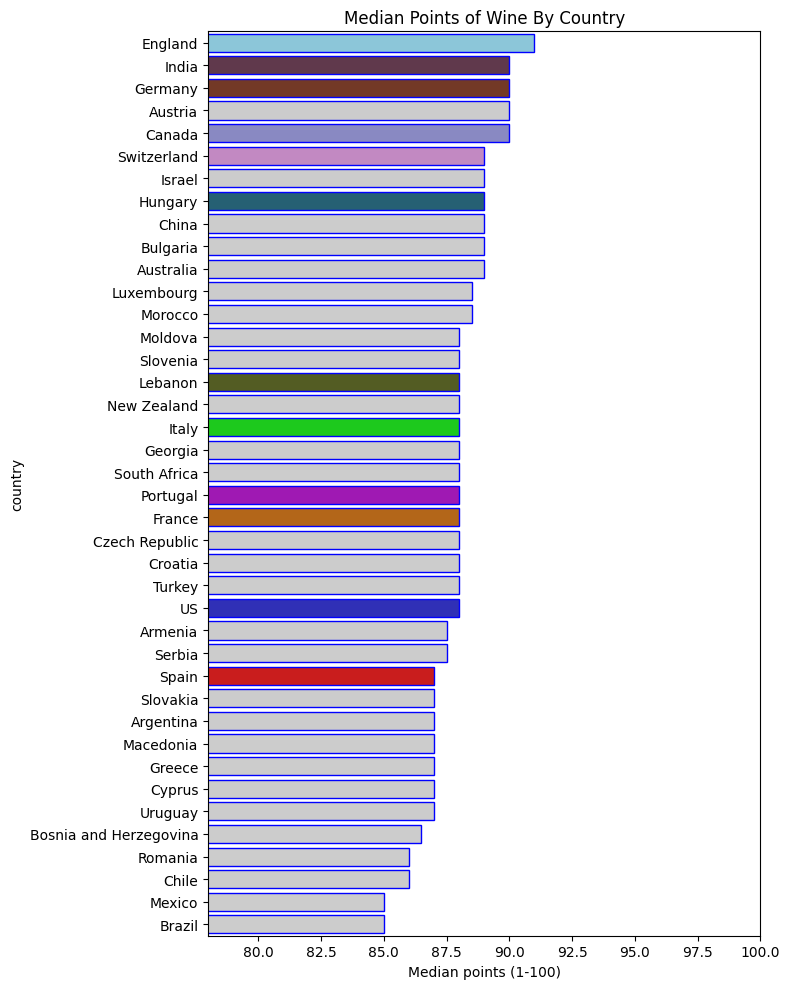

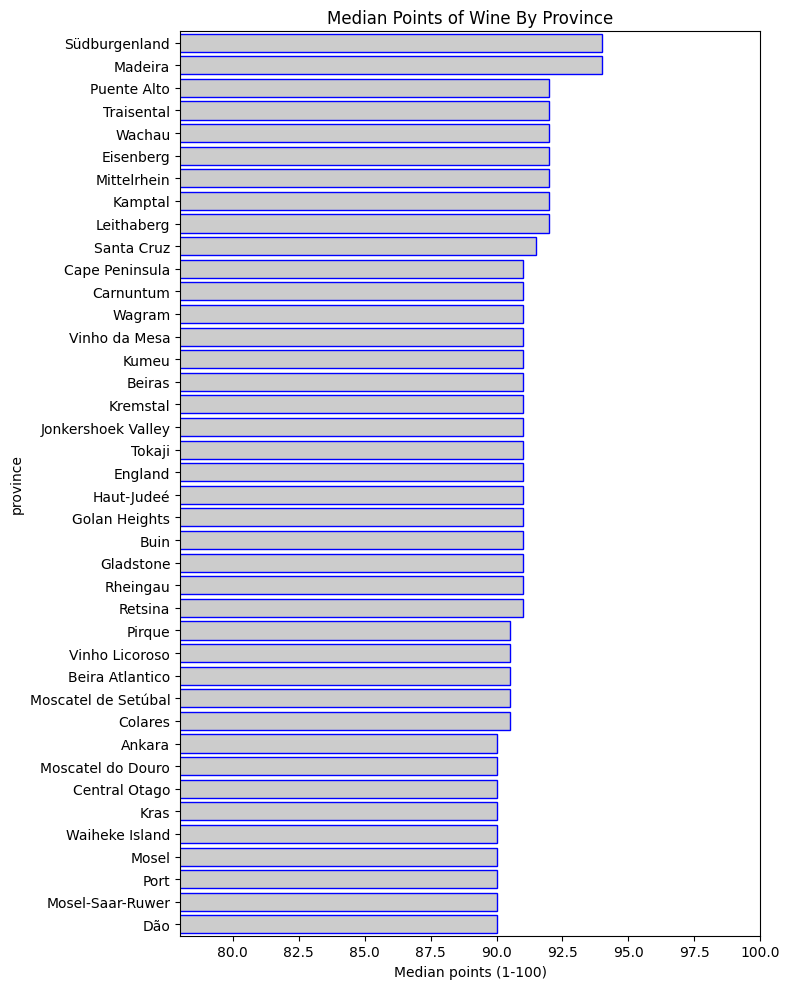

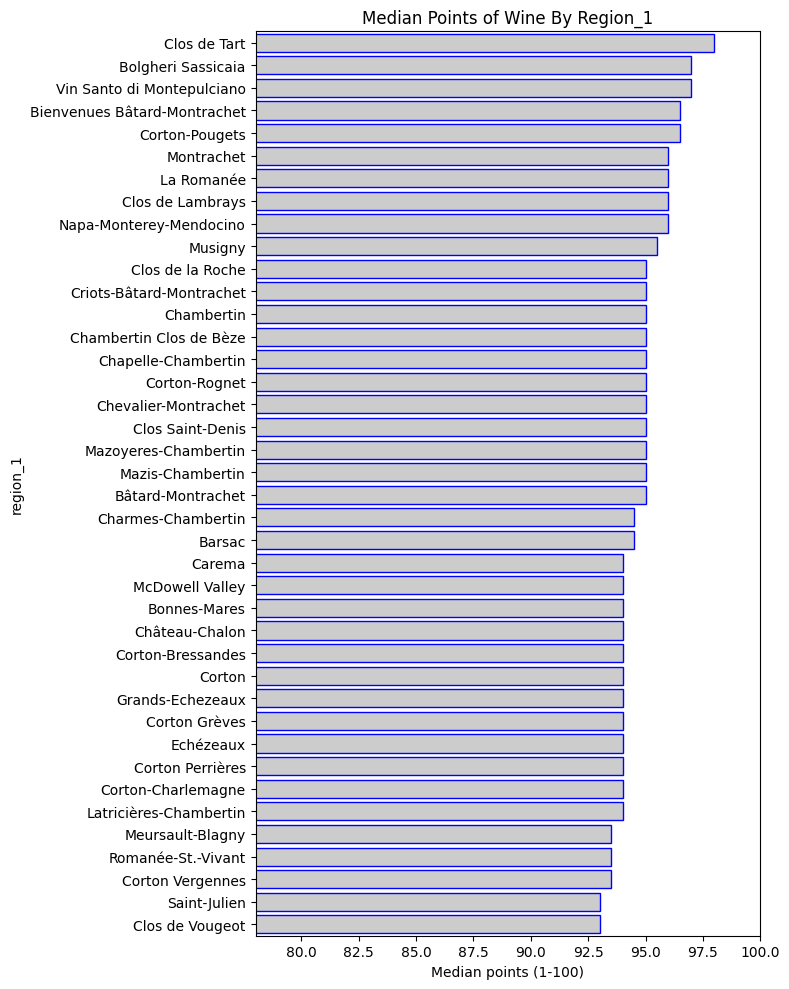

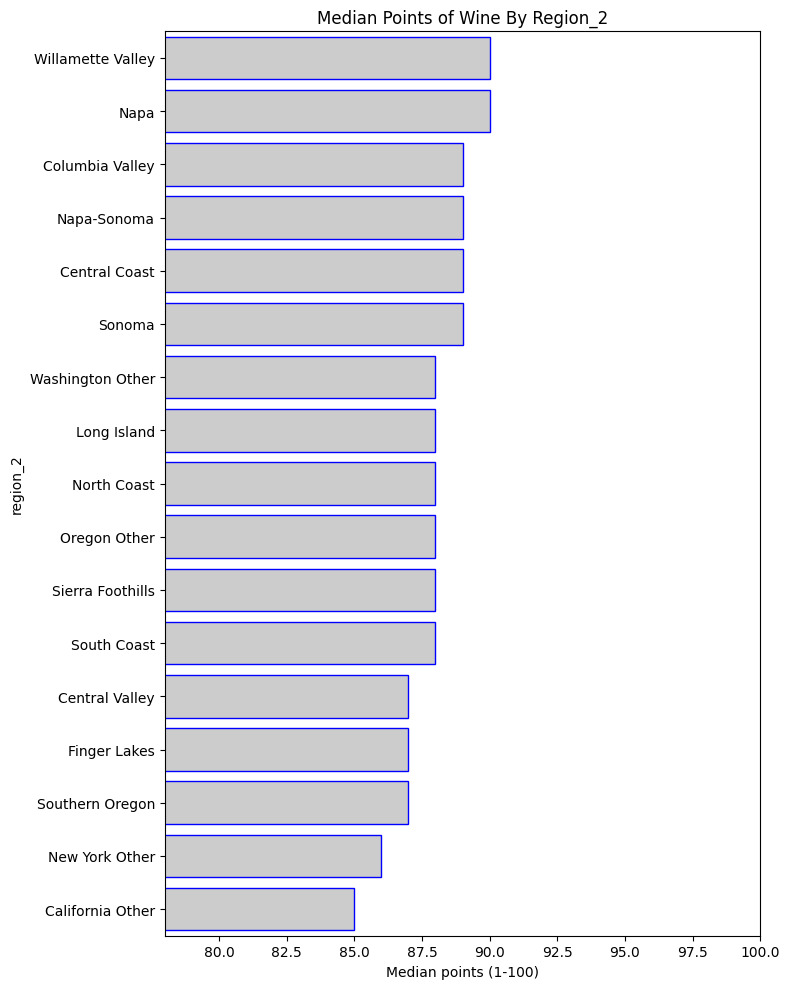

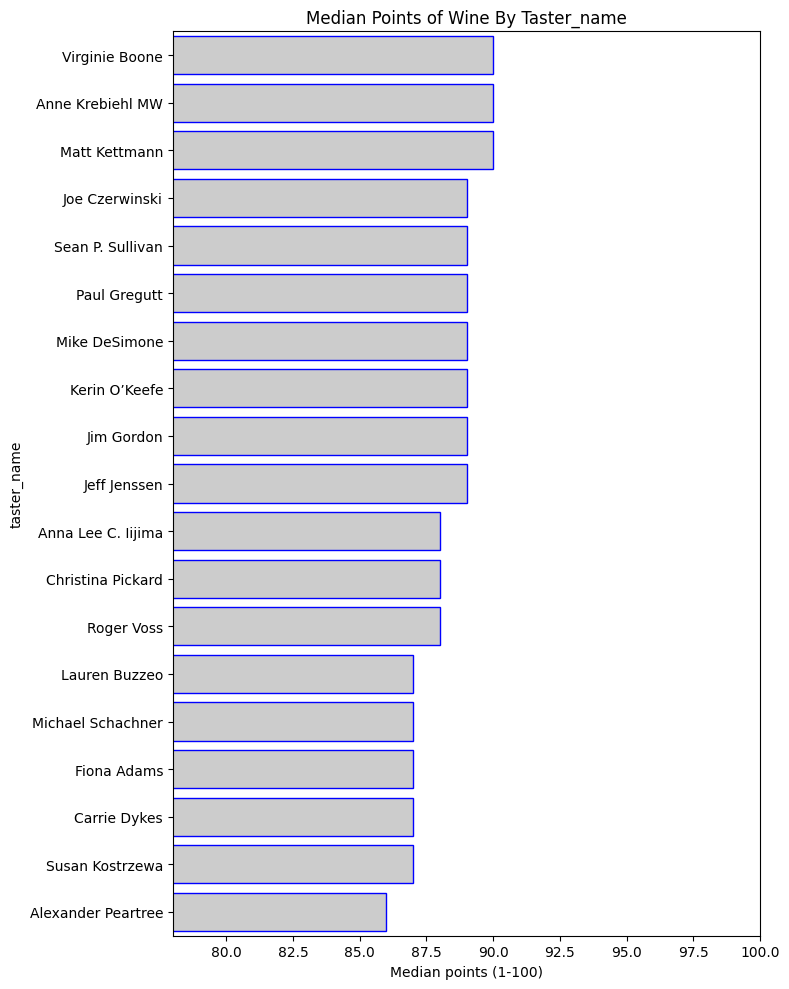

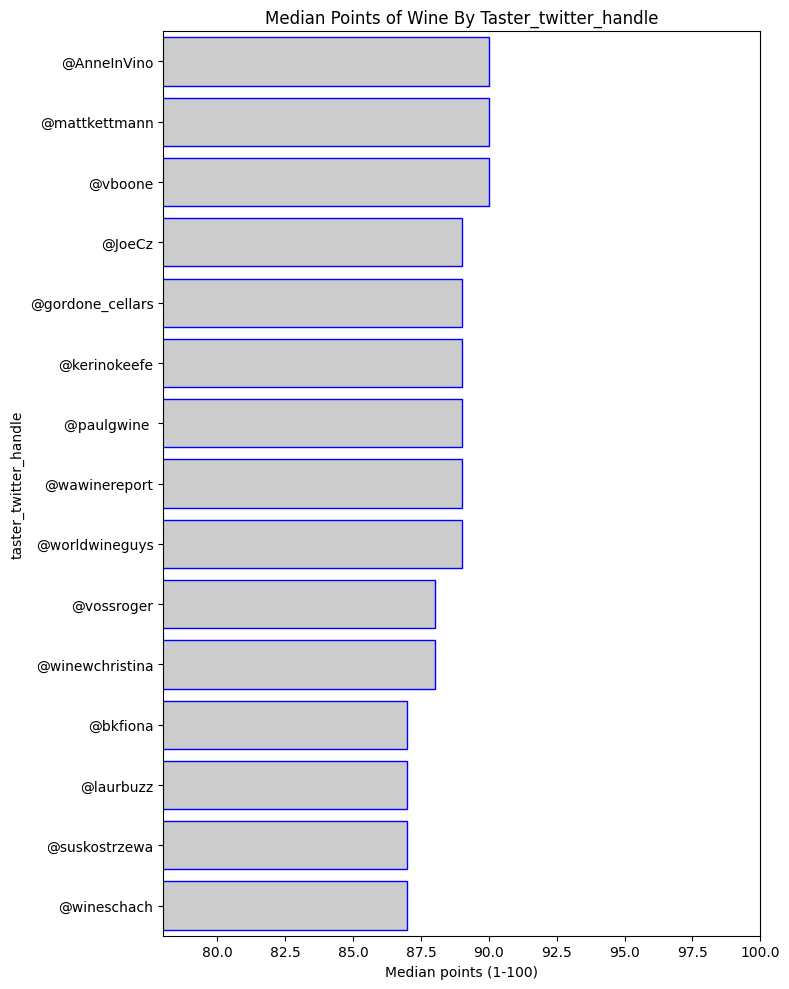

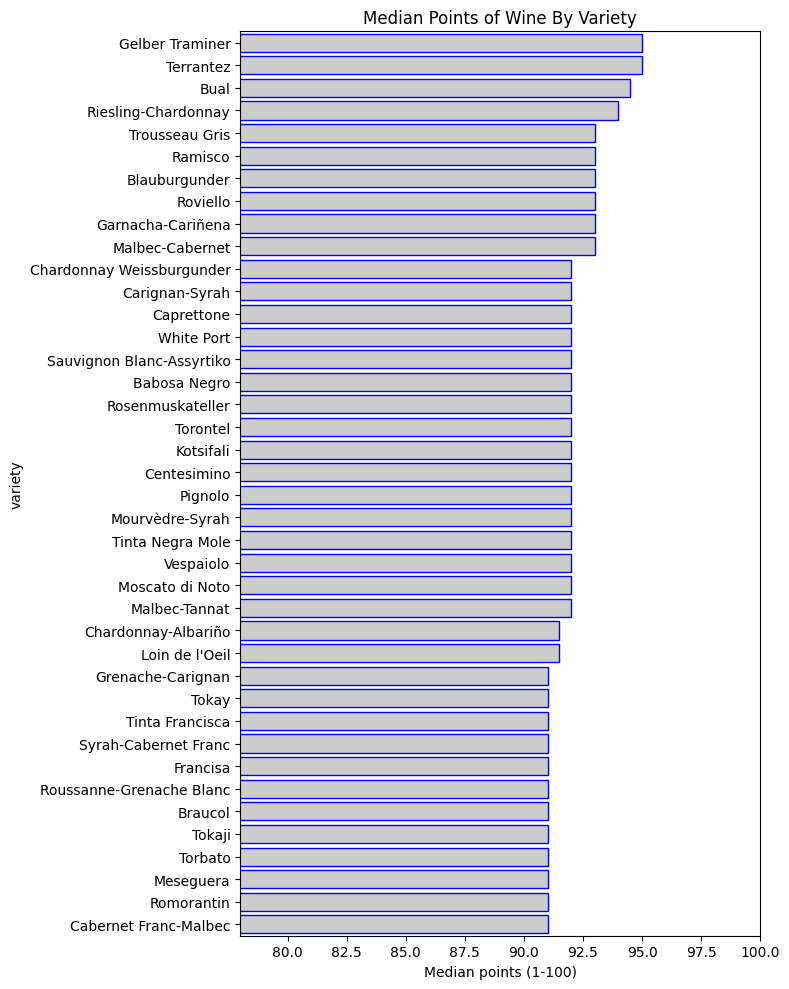

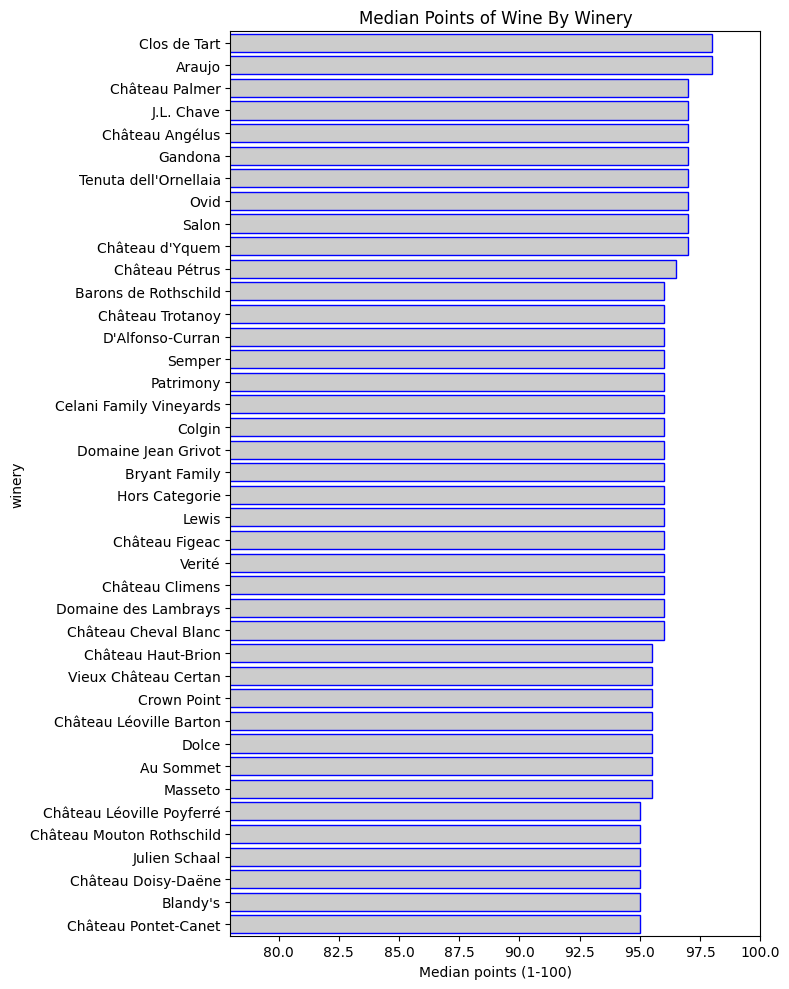

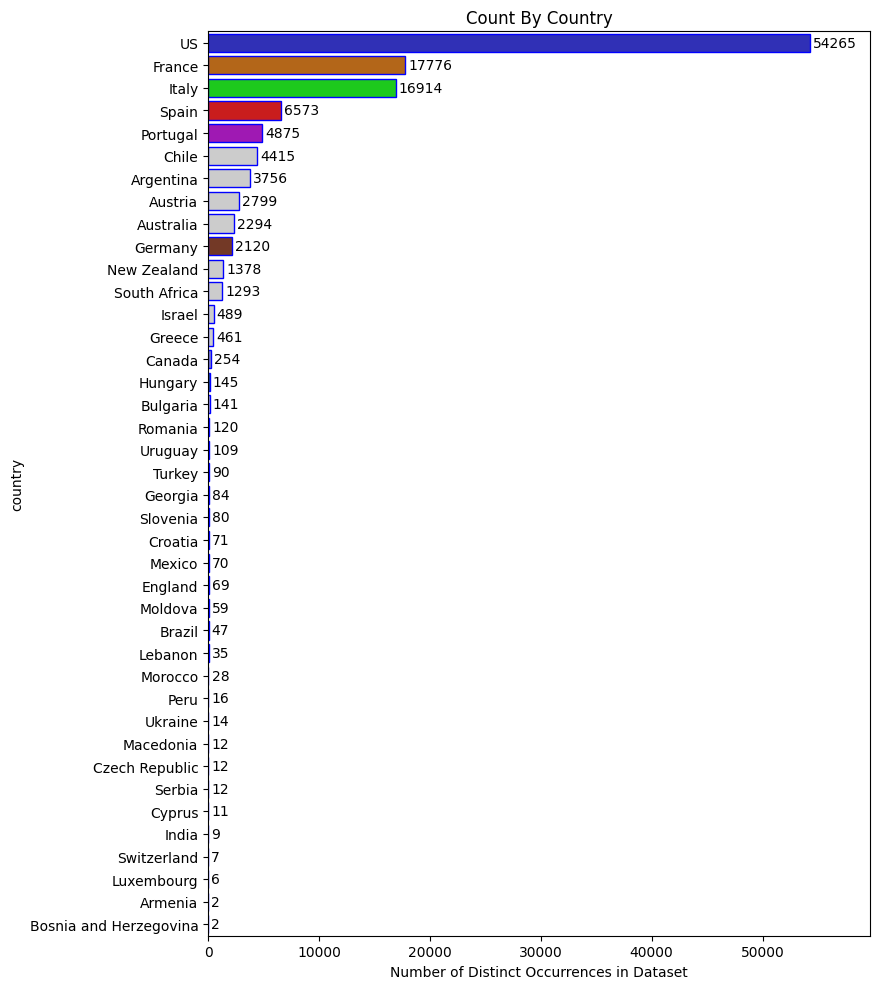

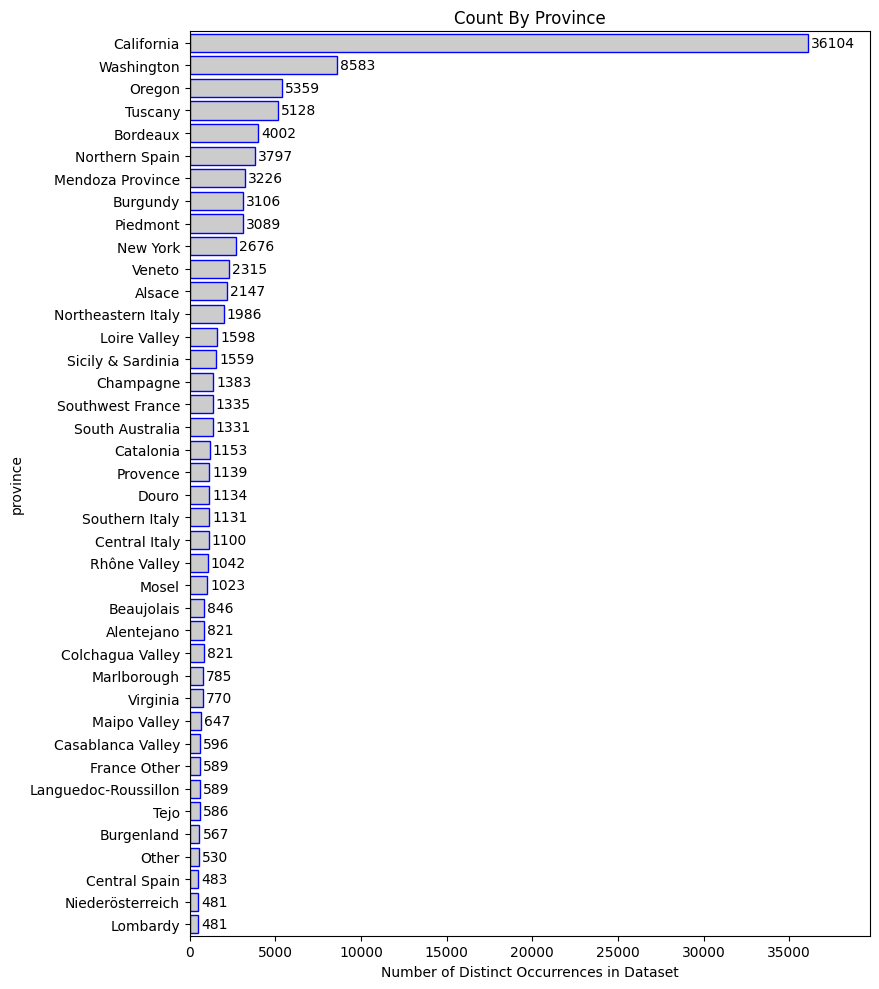

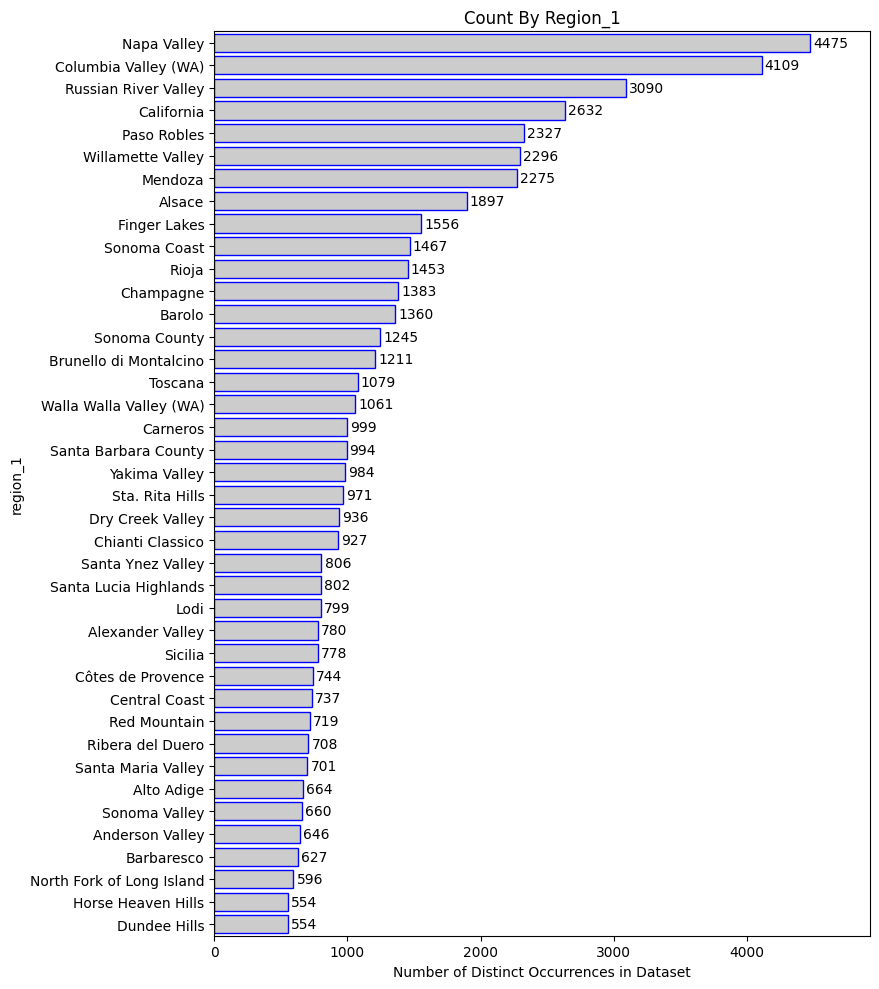

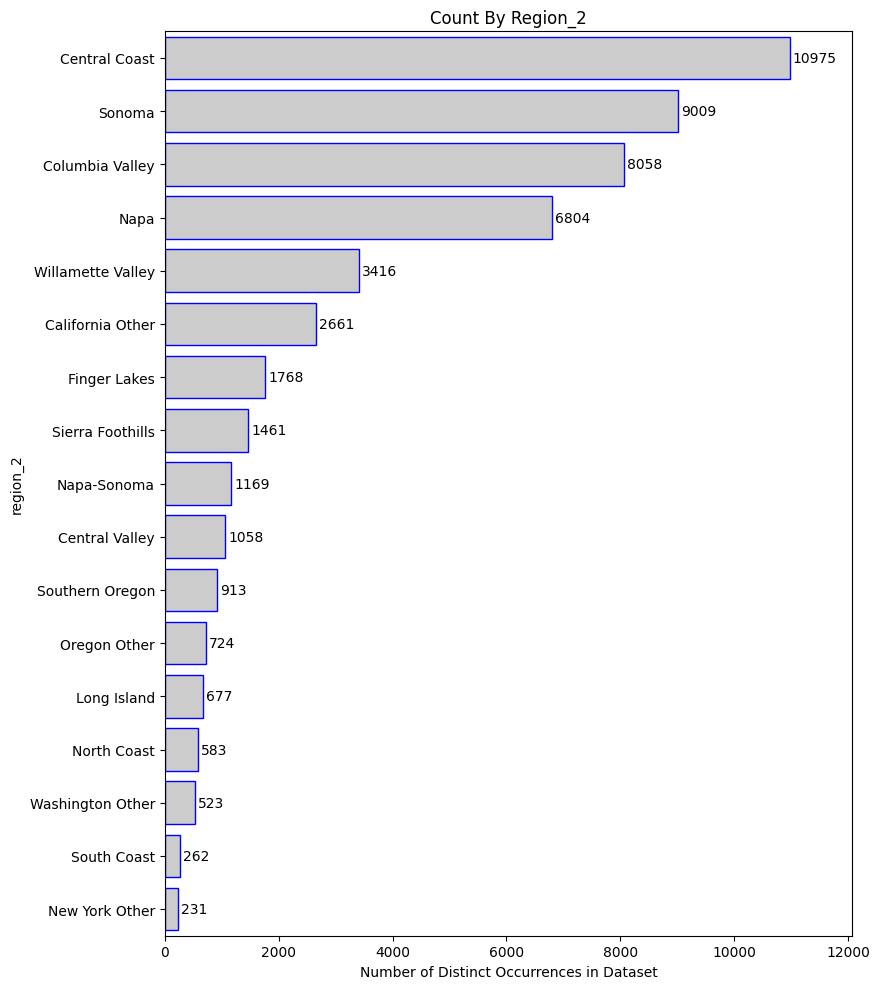

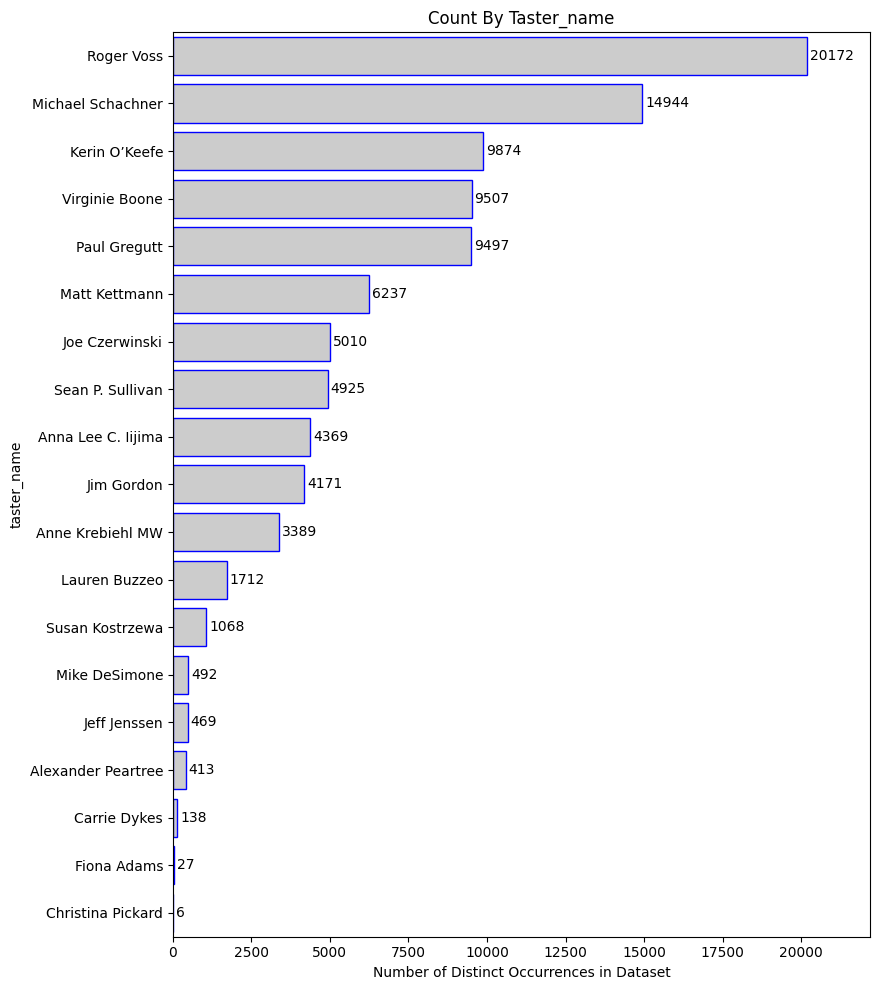

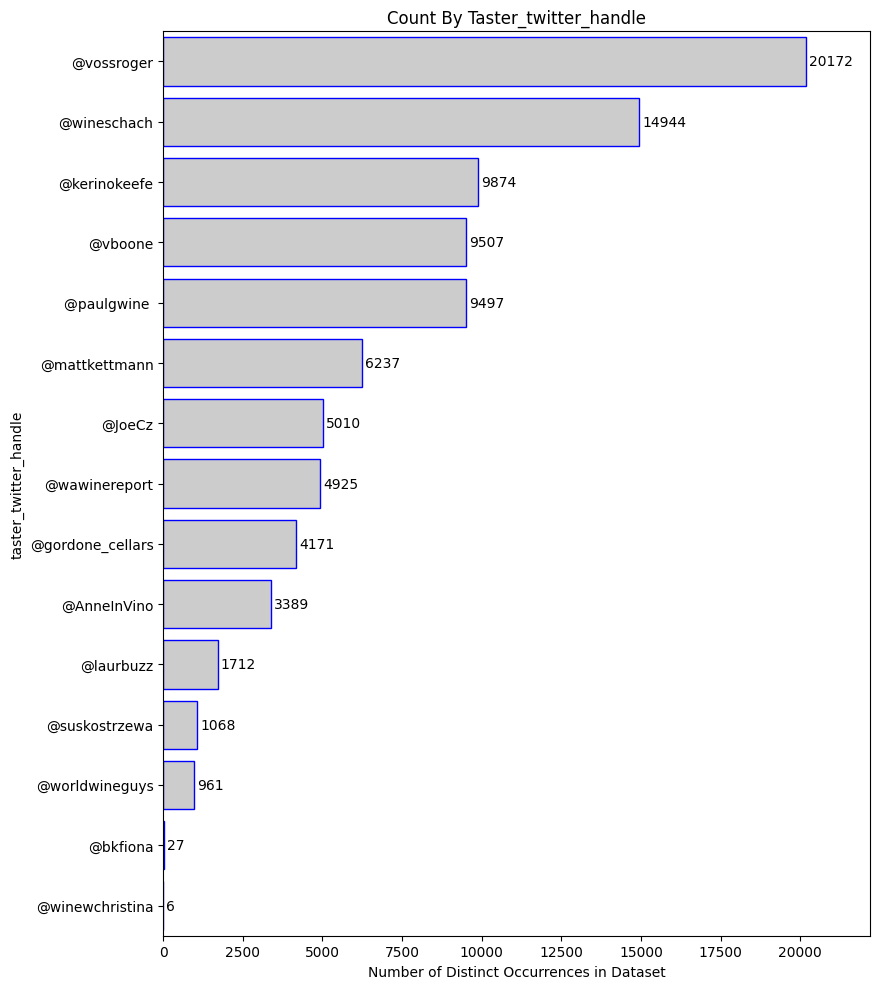

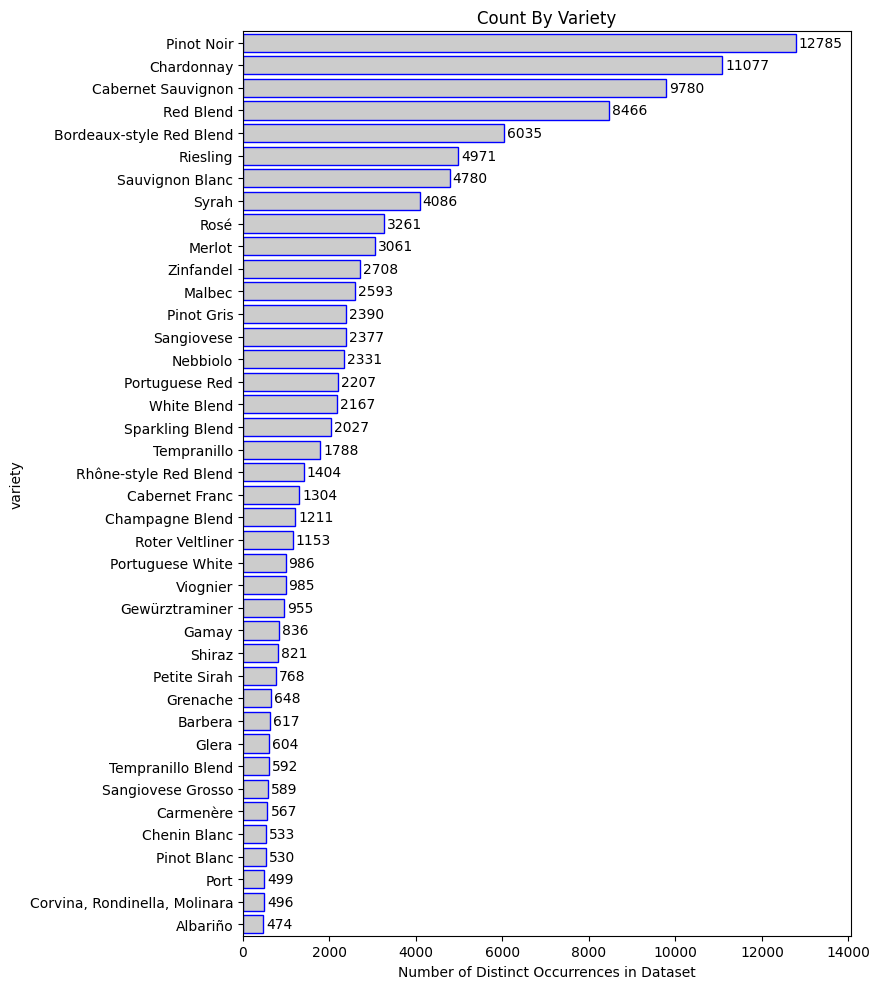

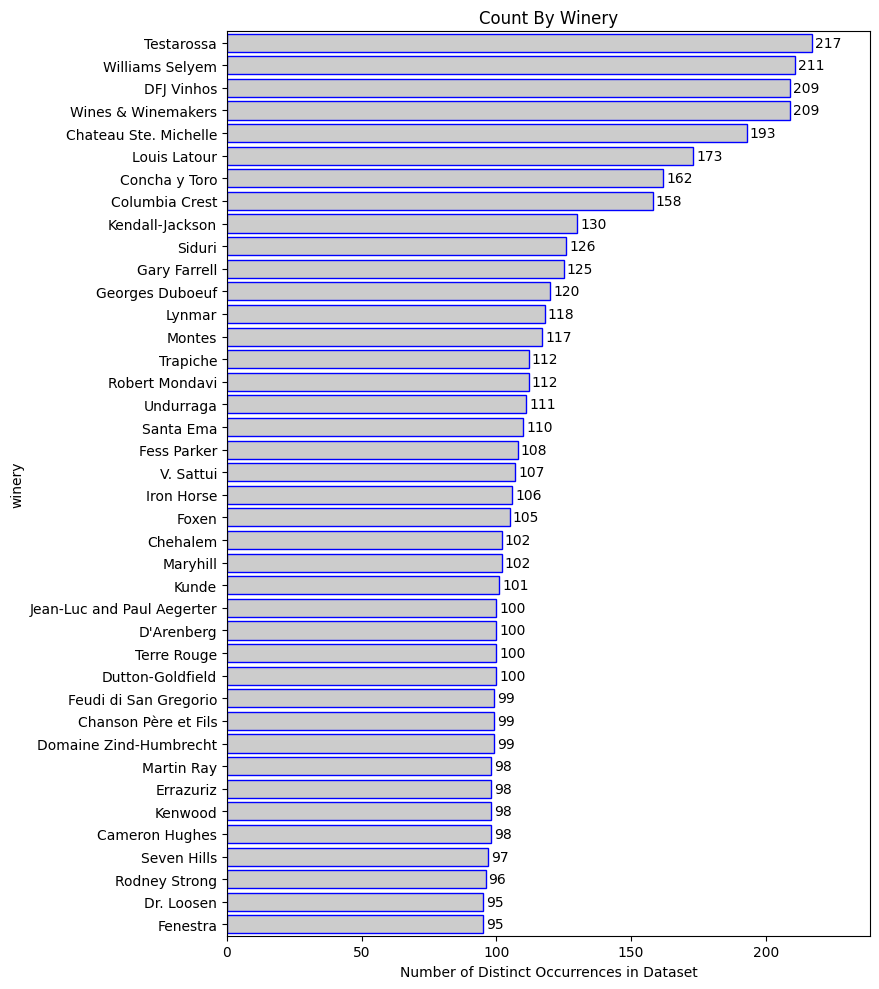

In [6]:
# - plotting for single level grouping for price
#  - mean price:
for factor in factors_to_group_by:
  p_title = f'Average Price of Wine By {factor[0].upper() + factor[1:] }'
  y_axis_desc = 'Mean price in $'
  color = (0.8, 0.8, 0.8, 0.1) if factor != 'country' else None #plot separate palette of colors for countries
  vis.plot_bar_chart(
    cur,
    con,
    f'price_basic_stats_grouped_by_{factor}',
    factor,
    'mean',
    limit=40,
    y_axis_description=y_axis_desc,
    p_title=p_title,
    color=color,
    edgecolor='blue',
    orient='h',
    figsize=[8,10]
  )
# - median price:
for factor in factors_to_group_by:
  p_title = f'Median Price of Wine By {factor[0].upper() + factor[1:] }'
  y_axis_desc = 'Median price in $'
  color = (0.8, 0.8, 0.8, 0.1) if factor != 'country' else None #plot separate palette of colors for countries
  vis.plot_bar_chart(
    cur,
    con,
    f'price_basic_stats_grouped_by_{factor}',
    factor,
    'median',
    limit=40,
    y_axis_description=y_axis_desc,
    p_title=p_title,
    color=color,
    edgecolor='blue',
    orient='h',
    figsize=[8,10]
  )
# average points
for factor in factors_to_group_by:
  p_title = f'Average Points of Wine By {factor[0].upper() + factor[1:] }'
  y_axis_desc = 'Mean points (1-100)'
  color = (0.8, 0.8, 0.8, 0.1) if factor != 'country' else None #plot separate palette of colors for countries
  vis.plot_bar_chart(
    cur,
    con,
    f'points_basic_stats_grouped_by_{factor}',
    factor,
    'mean',
    limit=40,
    y_axis_description=y_axis_desc,
    p_title=p_title,
    color=color,
    edgecolor='blue',
    orient='h',
    figsize=[8,10],
    bar_limits=(78, 100)
  )
# median points
for factor in factors_to_group_by:
  p_title = f'Median Points of Wine By {factor[0].upper() + factor[1:] }'
  y_axis_desc = 'Median points (1-100)'
  color = (0.8, 0.8, 0.8, 0.1) if factor != 'country' else None #plot separate palette of colors for countries
  vis.plot_bar_chart(
    cur,
    con,
    f'points_basic_stats_grouped_by_{factor}',
    factor,
    'median',
    limit=40,
    y_axis_description=y_axis_desc,
    p_title=p_title,
    color=color,
    edgecolor='blue',
    orient='h',
    figsize=[8,10],
    bar_limits=(78,100)
  )
# - counts of single grouped by
for factor in factors_to_group_by:
  p_title = f'Count By {factor[0].upper() + factor[1:] }'
  y_axis_desc = 'Number of Distinct Occurrences in Dataset'
  color = (0.8, 0.8, 0.8, 0.1) if factor != 'country' else None #plot separate palette of colors for countries
  vis.plot_bar_chart(
    cur,
    con,
    f'price_basic_stats_grouped_by_{factor}',
    factor,
    'count',
    limit=40,
    y_axis_description=y_axis_desc,
    p_title=p_title,
    color=color,
    edgecolor='blue',
    orient='h',
    figsize=[8.9,10],
    label_bars=True
  )


In [7]:
wine_table = pd.read_sql(f'SELECT * FROM {db_constants.WINE_INIT_TABLE_NAME}', con)

In [8]:
# count number of times India appears
country_counts = wine_table.groupby('country')['country'].count()
print(country_counts)

country
Argentina                  3756
Armenia                       2
Australia                  2294
Austria                    2799
Bosnia and Herzegovina        2
Brazil                       47
Bulgaria                    141
Canada                      254
Chile                      4415
China                         1
Croatia                      71
Cyprus                       11
Czech Republic               12
England                      69
France                    17776
Georgia                      84
Germany                    2120
Greece                      461
Hungary                     145
India                         9
Israel                      489
Italy                     16914
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1378
Peru                         16
Portugal                   4875


In [9]:
tasters_by_country = wine_table.groupby(by=['country', 'taster_name'], group_keys=False)['country', 'taster_name'].size().reset_index(name='count')
tasters_for_india = tasters_by_country[tasters_by_country['country'] == 'India']
print(tasters_for_india)
print(tasters_by_country[tasters_by_country['taster_name'] == 'Mike DeSimone'])

   country    taster_name  count
46   India  Mike DeSimone      9
     country    taster_name  count
1    Armenia  Mike DeSimone      2
11  Bulgaria  Mike DeSimone      1
22     China  Mike DeSimone      1
37   Georgia  Mike DeSimone     62
46     India  Mike DeSimone      9
48    Israel  Mike DeSimone    286
55   Lebanon  Mike DeSimone     20
66   Morocco  Mike DeSimone     26
90    Turkey  Mike DeSimone     85


In [10]:
tasters_by_country = tasters_by_country.sort_values('count', ascending=False)
tasters_by_country.to_sql('tasters_by_country', con, if_exists='replace')
tasters_by_country_limited_table_name = common_stat.get_table_recurs_limit_grouped_by(cur, con, 'tasters_by_country', col_of_scores='count', cols_to_group_by=['country', 'taster_name'], col_limits=[40, 10000], keep_duplicates=[True, True])
tasters_by_country_limited = db_op.read_table(cur, con, tasters_by_country_limited_table_name)
tasters_by_country_limited = tasters_by_country_limited.drop(columns=['index'])
print(tasters_by_country_limited)

         country         taster_name  count
0         France          Roger Voss  14395
1          Italy       Kerin O’Keefe   9874
2             US      Virginie Boone   9507
3             US        Paul Gregutt   9271
4          Spain   Michael Schachner   6503
..           ...                 ...    ...
102    Australia   Christina Pickard      1
103      Moldova  Anna Lee C. Iijima      1
104  Switzerland     Susan Kostrzewa      1
105        Chile       Matt Kettmann      1
106     Portugal       Lauren Buzzeo      1

[107 rows x 3 columns]


In [11]:
#num unique info
print("************")
print("Number of unique entries for various factors: ")
for factor in factors_to_group_by:
  print(f"The number of unique {factor}s that we have (by counting) is: ", common_stat.get_num_unique_rows_in_column(cur, con, db_constants.WINE_INIT_TABLE_NAME, factor))

************
Number of unique entries for various factors: 
The number of unique countrys that we have (by counting) is:  42
The number of unique provinces that we have (by counting) is:  422
The number of unique region_1s that we have (by counting) is:  1197
The number of unique region_2s that we have (by counting) is:  17
The number of unique taster_names that we have (by counting) is:  19
The number of unique taster_twitter_handles that we have (by counting) is:  15
The number of unique varietys that we have (by counting) is:  634
The number of unique winerys that we have (by counting) is:  15672


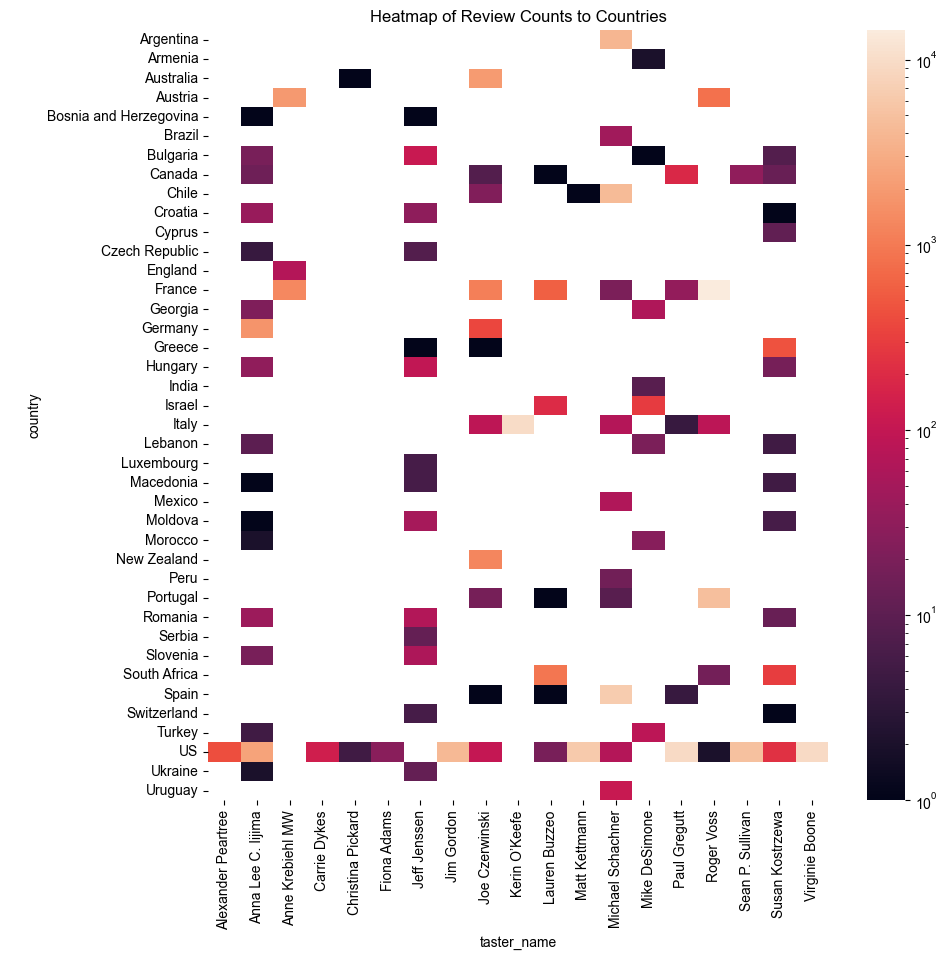

In [12]:
#plot heatmaps for taster_names
# by counts
fig, ax = plt.subplots(figsize=(10,10))
tasters_by_country_limited_for_heatmap = tasters_by_country_limited.pivot('country', 'taster_name', 'count')
heatmap_counts = sns.heatmap(tasters_by_country_limited_for_heatmap, 
  ax=ax, norm=LogNorm(vmin=1, vmax=14395)) 
plt.title("Heatmap of Review Counts to Countries")
sns.set(rc={'figure.facecolor':'lightgrey'})
#sns.set(rc={'axes.facecolor':'lightgrey'})

Text(92.24999999999999, 0.5, 'Country reviewed')

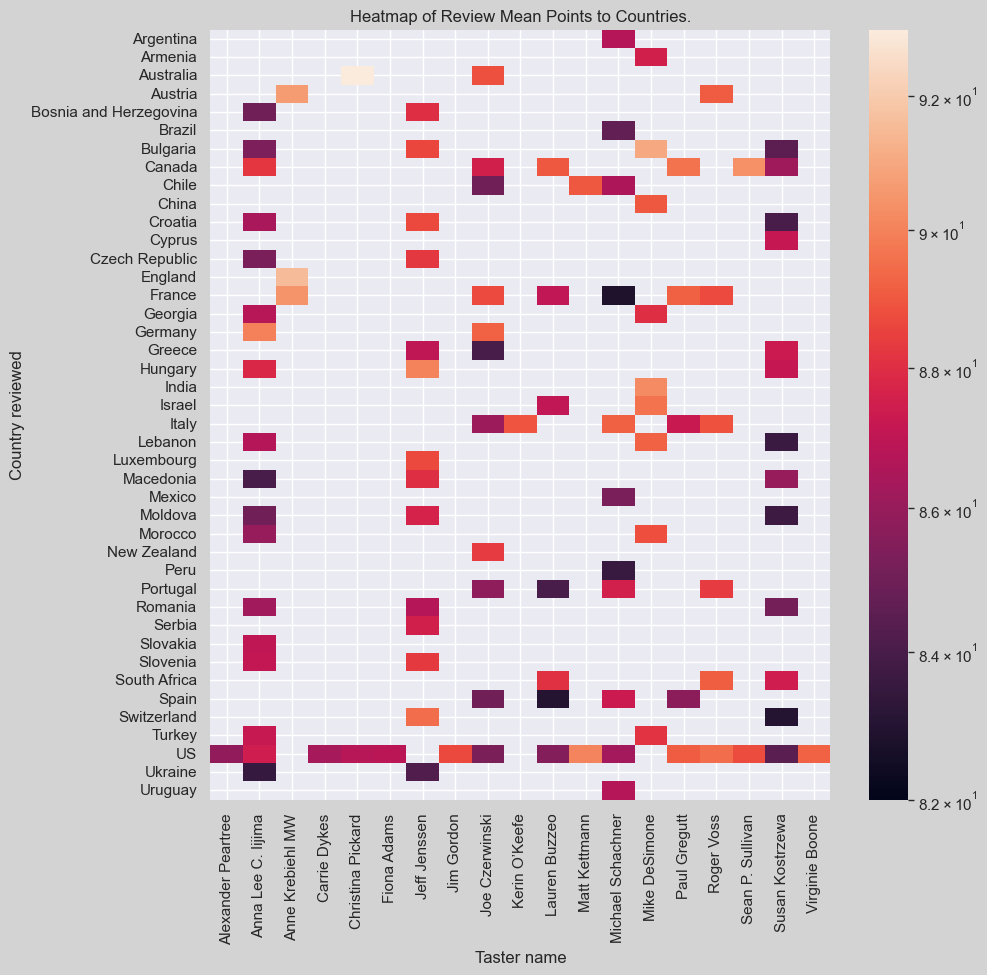

In [13]:
# plot taster name median number of points
fig, ax = plt.subplots(figsize=(10,10))
taster_name_country_points_median_table_name = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['country', 'taster_name']
)
taster_name_country_points_median_orig = db_op.read_table(cur, con, taster_name_country_points_median_table_name).sort_values('mean', ascending=False)
taster_name_country_points_median = taster_name_country_points_median_orig[['country', 'taster_name', 'mean']]
taster_name_country_points_median = taster_name_country_points_median.reset_index().drop(columns=['index']) #.pivot('country', 'taster_name', 'median')
taster_name_country_points_median_for_heatmap = taster_name_country_points_median.pivot('country', 'taster_name', 'mean')
heatmap_taster_country_points_median = sns.heatmap(taster_name_country_points_median_for_heatmap, 
ax=ax, norm=LogNorm(vmin=82.0, vmax=93.0)) 
plt.title("Heatmap of Review Mean Points to Countries.")
plt.xlabel("Taster name")
plt.ylabel("Country reviewed")

         country         taster_name       mean
0      Australia   Christina Pickard  93.000000
1        England    Anne Krebiehl MW  91.550725
2       Bulgaria       Mike DeSimone  91.000000
3        Austria    Anne Krebiehl MW  90.681122
4         France    Anne Krebiehl MW  90.466176
..           ...                 ...        ...
104         Peru   Michael Schachner  83.562500
105      Ukraine  Anna Lee C. Iijima  83.500000
106  Switzerland     Susan Kostrzewa  83.000000
107        Spain       Lauren Buzzeo  83.000000
108       France   Michael Schachner  82.850000

[109 rows x 3 columns]


Text(0.5, 12.44444444444443, 'Average points assigned')

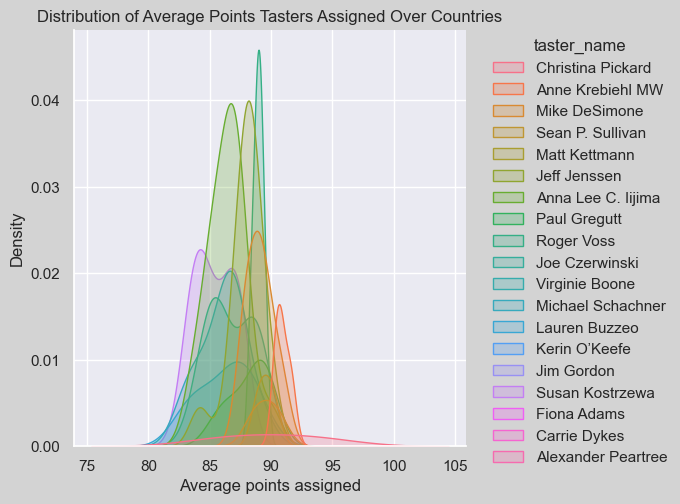

In [14]:
#plot distributions of average points by reviewer
print(taster_name_country_points_median)
taster_name_dists_plot = sns.displot(taster_name_country_points_median, x='mean', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Average Points Tasters Assigned Over Countries")
plt.xlabel("Average points assigned")

Text(0.5, 12.44444444444443, 'Average points assigned')

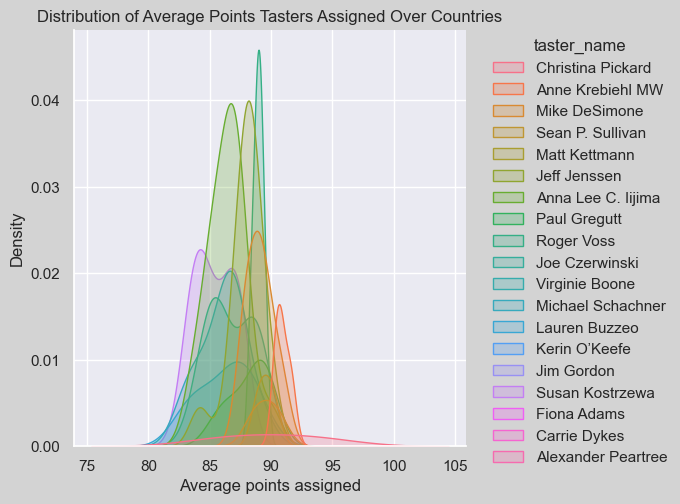

In [15]:
#plot distributions of average points by reviewer
taster_names_all = set(taster_name_country_points_median['taster_name'].unique())
taster_names_all = set({ #from just-above
  'Jim Gordon', 
  "Kerin O’Keefe", 
  'Roger Voss', 
  'Virginie Boone', 
  'Alexander Peartree', 
  'Mike DeSimone', 
  'Jeff Jenssen', 
  'Fiona Adams', 
  'Anne Krebiehl\xa0MW', 
  'Sean P. Sullivan', 
  'Christina Pickard', 
  'Matt Kettmann', 
  'Joe Czerwinski', 
  'Michael Schachner', 
  'Lauren Buzzeo', 
  'Carrie Dykes', 
  'Anna Lee C. Iijima', 
  'Susan Kostrzewa', 
  'Paul Gregutt'
})  
taster_name_dists_plot = sns.displot(taster_name_country_points_median[taster_name_country_points_median['taster_name'].isin(taster_names_all)]
, x='mean', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Average Points Tasters Assigned Over Countries")
plt.xlabel("Average points assigned")

In [16]:
# get standard distributions of means by taster_name-country for each taster_name
to_save_table_name_taster_name_country_points_mean_orig = 'taster_name_country_points_mean_orig'
taster_name_country_points_median_orig.to_sql(to_save_table_name_taster_name_country_points_mean_orig, con, if_exists='replace')
taster_std_table_name = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, 'median', cols_to_group_by=['taster_name'],
  input_table_name = to_save_table_name_taster_name_country_points_mean_orig,
  res_table_suffix="",
  stats_to_compute=['std']
)
taster_std = db_op.read_table(cur, con, taster_std_table_name)
print(taster_std)

           taster_name       std
0   Alexander Peartree       NaN
1   Anna Lee C. Iijima  1.631241
2     Anne Krebiehl MW  0.577350
3         Carrie Dykes       NaN
4    Christina Pickard  4.242641
5          Fiona Adams       NaN
6         Jeff Jenssen  1.508675
7           Jim Gordon       NaN
8       Joe Czerwinski  1.862306
9        Kerin O’Keefe       NaN
10       Lauren Buzzeo  2.138090
11       Matt Kettmann  0.707107
12   Michael Schachner  1.868397
13       Mike DeSimone  1.130388
14        Paul Gregutt  1.823458
15          Roger Voss  0.801041
16    Sean P. Sullivan  1.414214
17     Susan Kostrzewa  1.688954
18      Virginie Boone       NaN


(0.0, 0.14)

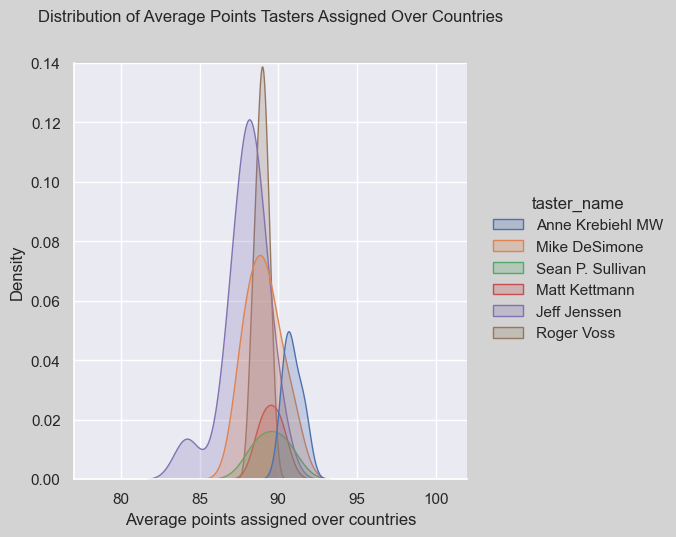

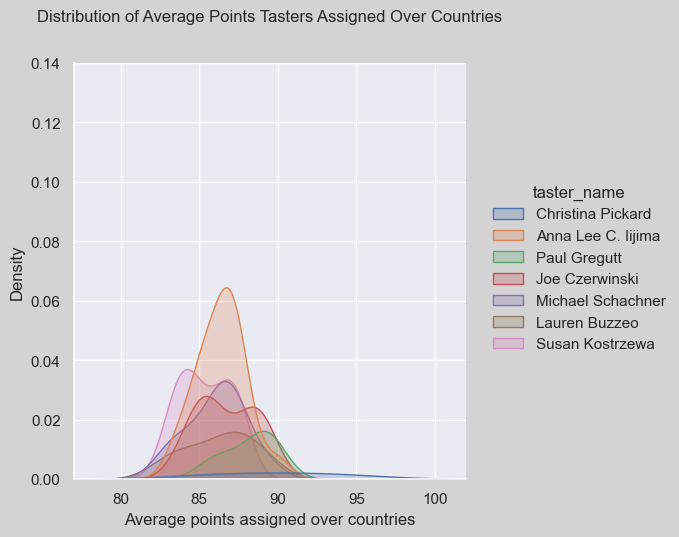

In [17]:
#drop reviewers that reviewed in only one country (ie NaN std above) from analysis here
taster_std = taster_std.dropna()

#plot where tasters have std less than:
std_to_split_tasters_on = 1.6
taster_std_set_tasters_std_less = set(taster_std[taster_std['std'] <= std_to_split_tasters_on]['taster_name'].unique())
taster_std_set_tasters_std_greater = set(taster_std[taster_std['std'] > std_to_split_tasters_on]['taster_name'].unique())

#plot for tasters-countries where std is less than or equal to std to split on:
taster_name_dists_plot = sns.displot(taster_name_country_points_median[taster_name_country_points_median['taster_name'].isin(taster_std_set_tasters_std_less)]
, x='mean', hue='taster_name', kind='kde', fill=True) #, ax=ax)
plt.title("Distribution of Average Points Tasters Assigned Over Countries", y=1.08)
plt.xlabel("Average points assigned over countries")
plt.xlim(77, 102)
plt.ylim(0, 0.14)

#plot for tasters-countries where std is greater than std to split on:
taster_name_dists_plot = sns.displot(taster_name_country_points_median[taster_name_country_points_median['taster_name'].isin(taster_std_set_tasters_std_greater)]
, x='mean', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Average Points Tasters Assigned Over Countries", y=1.08)
plt.xlabel("Average points assigned over countries")
plt.xlim(77, 102)
plt.ylim(0, 0.14)





Text(0.5, 1.0, 'Average Points vs Number Reviews for Tasters per Wineries')

<Figure size 1000x1000 with 0 Axes>

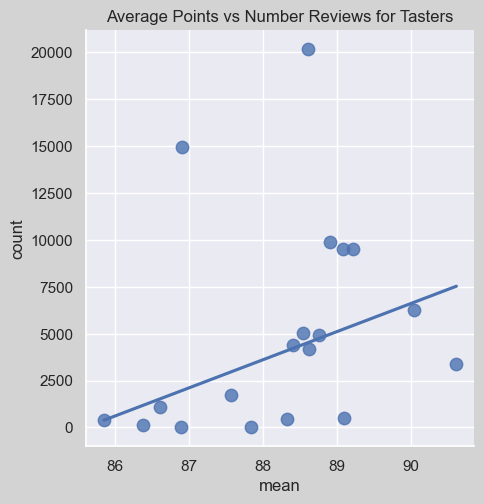

<Figure size 1000x1000 with 0 Axes>

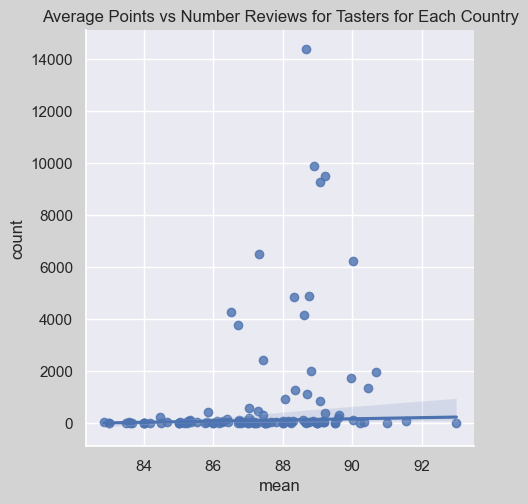

<Figure size 1000x1000 with 0 Axes>

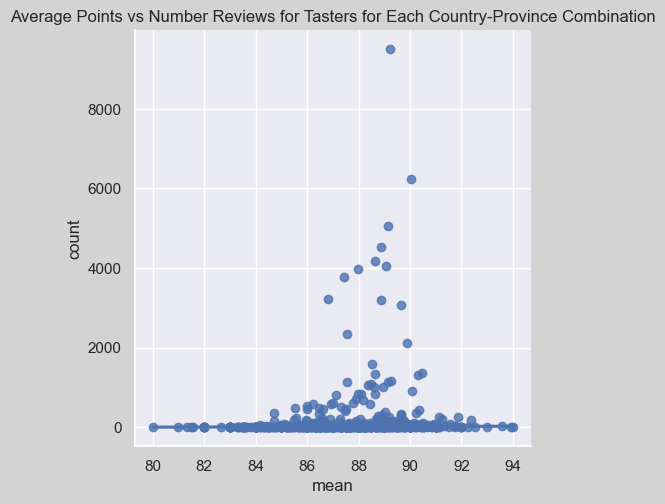

<Figure size 1000x1000 with 0 Axes>

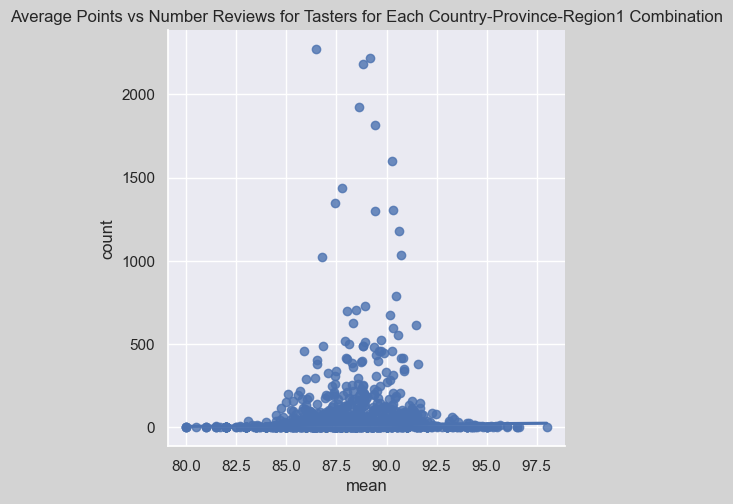

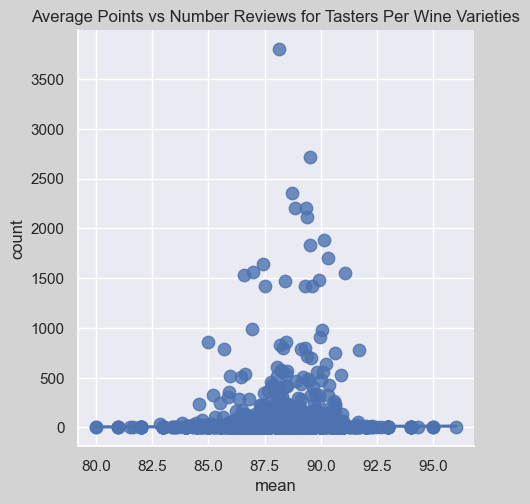

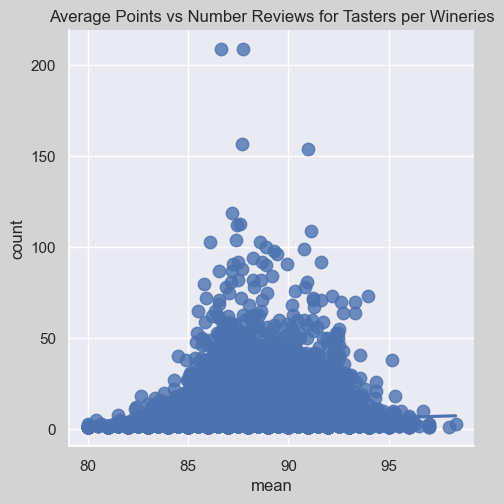

In [18]:
#scatter plot of number of times reviewed to average points given, and also for country, and country-province, and country-province-region_1,
#and grouped by 
table_name_taster_name_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['taster_name']
)
table_name_taster_name__country_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['country', 'taster_name']
)
table_name_taster_name_country_province_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['country', 'province', 'taster_name']
)
table_name_taster_name_country_province_region1_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['country', 'province', 'region_1', 'taster_name']
)
table_name_taster_name_variety_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['variety', 'taster_name']
)
table_name_taster_name_winery_points_mean_count_orig = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, col_name='points', cols_to_group_by=['winery', 'taster_name']
)

table_taster_name_points_mean_count = db_op.read_table(cur, con, table_name_taster_name_points_mean_count_orig)[['taster_name', 'count', 'mean']]
table_taster_name_country_points_mean_count = db_op.read_table(cur, con, table_name_taster_name__country_points_mean_count_orig)[['country', 'taster_name', 'count', 'mean']]
table_taster_name_country_province_points_mean_count = db_op.read_table(cur, con, table_name_taster_name_country_province_points_mean_count_orig)[['country', 'province', 'taster_name', 'count', 'mean']]
table_taster_name_country_province_region1_points_mean_count = db_op.read_table(cur, con, table_name_taster_name_country_province_region1_points_mean_count_orig)[['country', 'province', 'region_1', 'taster_name', 'count', 'mean']]
table_taster_name_variety_points_mean_count = db_op.read_table(cur, con, table_name_taster_name_variety_points_mean_count_orig)[['variety', 'taster_name', 'count', 'mean']]
table_taster_name_winery_points_mean_count = db_op.read_table(cur, con, table_name_taster_name_winery_points_mean_count_orig)[['winery', 'taster_name', 'count', 'mean']]


#plot for taster_names overall
figure(figsize=(10,10))
#sns.scatterplot(data=table_taster_name_points_mean_count, x='mean', y='count', hue='taster_name')
sns.lmplot(x="mean", y="count", data=table_taster_name_points_mean_count,
           robust=True, ci=None, scatter_kws={"s": 80})
plt.title("Average Points vs Number Reviews for Tasters")

#plot for taster_names to countries
figure(figsize=(10,10))
sns.lmplot(x="mean", y="count", data=table_taster_name_country_points_mean_count,
           robust=True)
plt.title("Average Points vs Number Reviews for Tasters for Each Country")

#plot for taster_names to countries and provinces
figure(figsize=(10,10))
sns.lmplot(x="mean", y="count", data=table_taster_name_country_province_points_mean_count,
           robust=True)
plt.title("Average Points vs Number Reviews for Tasters for Each Country-Province Combination")

#plot for taster_names to countries and provinces and regions
figure(figsize=(10,10))
sns.lmplot(x="mean", y="count", data=table_taster_name_country_province_region1_points_mean_count,
           robust=True)
plt.title("Average Points vs Number Reviews for Tasters for Each Country-Province-Region1 Combination")

#plot for taster_names to variety
sns.lmplot(x="mean", y="count", data=table_taster_name_variety_points_mean_count,
           robust=True, ci=None, scatter_kws={"s": 80})
plt.title("Average Points vs Number Reviews for Tasters Per Wine Varieties")

#plot for taster_names to winery
sns.lmplot(x="mean", y="count", data=table_taster_name_winery_points_mean_count,
           robust=True, ci=None, scatter_kws={"s": 80})
plt.title("Average Points vs Number Reviews for Tasters per Wineries")

           taster_name       std
0   Alexander Peartree  1.937922
1   Anna Lee C. Iijima  2.561734
2     Anne Krebiehl MW  2.371260
3         Carrie Dykes  2.001177
4    Christina Pickard  3.600926
5          Fiona Adams  1.739437
6         Jeff Jenssen  2.041991
7           Jim Gordon  2.700144
8       Joe Czerwinski  2.864975
9        Kerin O’Keefe  2.492626
10       Lauren Buzzeo  2.446497
11       Matt Kettmann  2.566836
12   Michael Schachner  3.027991
13       Mike DeSimone  1.997203
14        Paul Gregutt  2.814795
15          Roger Voss  3.004481
16    Sean P. Sullivan  2.462331
17     Susan Kostrzewa  2.364249
18      Virginie Boone  2.997638
           taster_name  count  min  max       mean  median       std
0   Alexander Peartree    413   80   91  85.854722    86.0  1.937922
1   Anna Lee C. Iijima   4369   80   98  88.405127    88.0  2.561734
2     Anne Krebiehl MW   3389   80   97  90.612570    90.0  2.371260
3         Carrie Dykes    138   81   92  86.384058    87.0  2.00

Text(0.5, 12.44444444444443, 'Points assigned by reviewer')

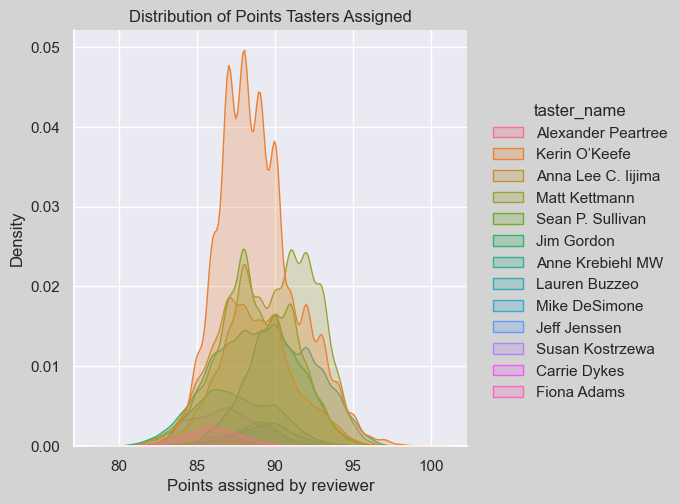

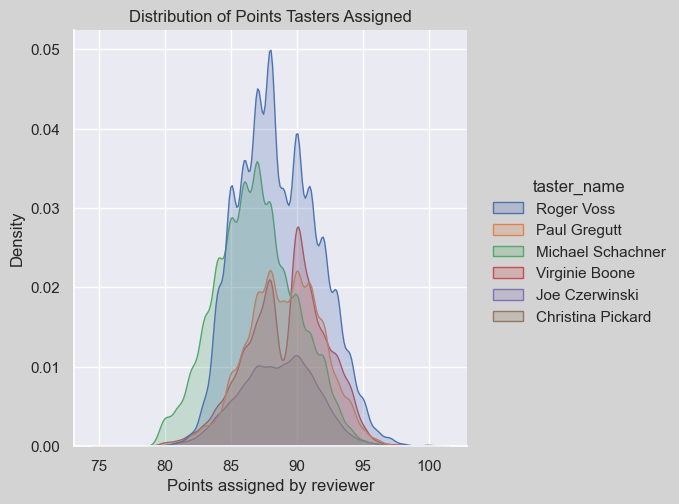

In [19]:
#plot distributions of points assigned for each taster
taster_name_points_table_name = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, 'points', cols_to_group_by=['taster_name']
)
taster_name_points_no_stats_table_name = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME)[['points', 'taster_name']]
tester_name_points = db_op.read_table(cur, con, taster_name_points_table_name)
taster_std = tester_name_points[['taster_name', 'std']]
print(taster_std)
print(tester_name_points)

#drop reviews that only reviewed once
taster_std = taster_std.dropna()

#plot where tasters have std less than:
std_to_split_tasters_on = 2.8
taster_std_set_tasters_std_less = set(taster_std[taster_std['std'] <= std_to_split_tasters_on]['taster_name'].unique())
taster_std_set_tasters_std_greater = set(taster_std[taster_std['std'] > std_to_split_tasters_on]['taster_name'].unique())
tasters_points_std_less = taster_name_points_no_stats_table_name[taster_name_points_no_stats_table_name['taster_name'].isin(taster_std_set_tasters_std_less)][['points', 'taster_name']]
tasters_points_std_greater = taster_name_points_no_stats_table_name[taster_name_points_no_stats_table_name['taster_name'].isin(taster_std_set_tasters_std_greater)][['points', 'taster_name']]

#plot for tasters-countries where std is less than or equal to std to split on:
taster_name_dists_plot = sns.displot(tasters_points_std_less
, x='points', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Points Tasters Assigned")
plt.xlabel("Points assigned by reviewer")

#plot for tasters-countries where std is greater than std to split on:
taster_name_dists_plot = sns.displot(tasters_points_std_greater
, x='points', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Points Tasters Assigned")
plt.xlabel("Points assigned by reviewer")

(0.0, 0.035)

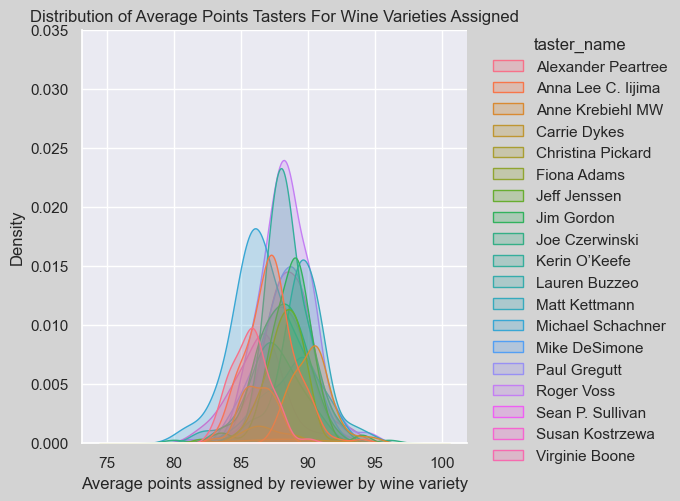

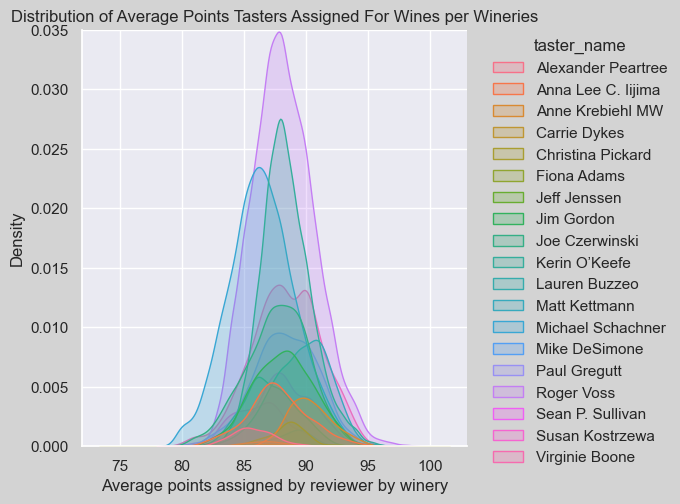

In [20]:
# (using from above): plotting points grouped by winery, variety
# - plot distributions of points assigned for each taster by variety
taster_name_points_table_name = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, 'points', cols_to_group_by=['taster_name', 'variety']
)
# taster_name_points_no_stats_table_name = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME).groupby(['points', 'taster_name'])[['points', 'taster_name', 'variety']].apply(lambda x: x)
tester_name_points = db_op.read_table(cur, con, taster_name_points_table_name)

#plot for tasters-countries where std is less than or equal to std to split on:
taster_name_dists_plot = sns.displot(tester_name_points[['mean', 'taster_name']]
, x='mean', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Average Points Tasters For Wine Varieties Assigned")
plt.xlabel("Average points assigned by reviewer by wine variety")
plt.ylim(0, 0.035)

# - plot distributions of points assigned for each taster by winery
taster_name_points_table_name = common_stat.get_basic_stats_of_col1_grouped_by_cols(
  cur, con, 'points', cols_to_group_by=['taster_name', 'winery']
)
# taster_name_points_no_stats_table_name = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME).groupby(['points', 'taster_name'])[['points', 'taster_name', 'variety']].apply(lambda x: x)
tester_name_points = db_op.read_table(cur, con, taster_name_points_table_name)

#plot for tasters-countries where std is less than or equal to std to split on:
taster_name_dists_plot = sns.displot(tester_name_points[['mean', 'taster_name']]
, x='mean', hue='taster_name', kind='kde', fill=True)
plt.title("Distribution of Average Points Tasters Assigned For Wines per Wineries")
plt.xlabel("Average points assigned by reviewer by winery")
plt.ylim(0, 0.035)

In [21]:
#Mapping
wine_table = db_op.read_table(cur, con, db_constants.WINE_INIT_TABLE_NAME)

#counts by countries of reviews
country_review_counts_df = wine_table.groupby(['country']).size().reset_index(name='counts')

In [22]:
#counts of wine reviews per country
fig = px.choropleth(country_review_counts_df, locations='country', locationmode='country names', color='counts',
title="Counts of Wine Reviews Per Country", width=800, height=600, projection='equirectangular')
fig.update_layout(
  margin=dict(l=10, r=10), #resize graph,
  title_pad=dict(t=5)
)
fig.show()




In [23]:
#average price per country
country_avg_price_df = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_country')[['country', 'mean']]
fig = px.choropleth(country_avg_price_df, locations='country', locationmode='country names', color='mean',
title="Average Price In Dollars of Wine Reviews Per Country", width=800, height=600, projection='equirectangular')
fig.update_layout(
  margin=dict(l=10, r=10), #resize graph,
  title_pad=dict(t=5)
)
fig.show()

In [24]:
#median points per country
country_median_points_df = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_country')[['country', 'median']]
fig = px.choropleth(country_median_points_df, locations='country', locationmode='country names', color='median',
title="Median Points of Wine Reviews Per Country", width=800, height=600, projection='equirectangular')
fig.update_layout(
  margin=dict(l=10, r=10), #resize graph,
  title_pad=dict(t=5)
)
fig.show()


Text(22.375, 0.5, 'Median Points Assigned')

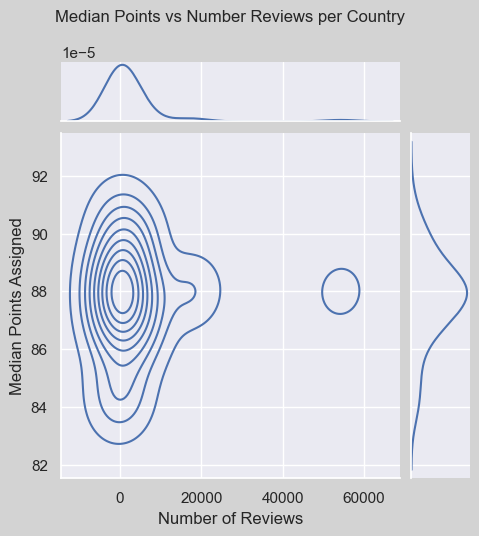

In [25]:
# join median points with number of reviews per country to see if correlation
country_review_counts_median_points_df = db_op.join_dfs(country_median_points_df, country_review_counts_df, ['country'])
plot = sns.jointplot(x="counts", y="median", data=country_review_counts_median_points_df, ax=ax, height=5, kind='kde') #robust=True,
plt.title("Median Points vs Number Reviews per Country", y=1.3)
plt.xlabel("Number of Reviews")
plt.ylabel("Median Points Assigned")

Text(0, 0.5, 'Price for Reviewed Wine')

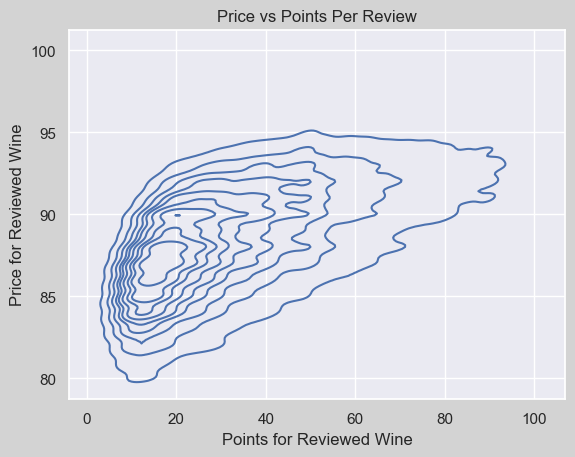

In [26]:
#jointplot of points vs price
points_price_df = wine_table[['points', 'price']]
#limit to prices under 1000
points_price_df_1000k = points_price_df[points_price_df['price'] < 100]

plot = sns.kdeplot(x="price", y="points", data=points_price_df_1000k, height=5, kind='kde') #robust=True,
plt.title("Price vs Points Per Review")
plt.xlabel("Points for Reviewed Wine")
plt.ylabel("Price for Reviewed Wine")


Text(0.5, 12.44444444444443, 'Points for Reviewed Wines')

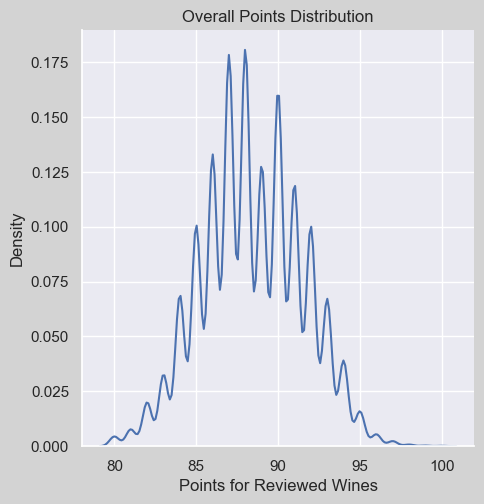

In [27]:
#plot overall distribution of points
sns.displot(points_price_df['points'].reset_index(), x='points', kind='kde')
plt.title("Overall Points Distribution")
plt.xlabel("Points for Reviewed Wines")



Text(0.5, 12.44444444444443, 'Price for Reviewed Wines')

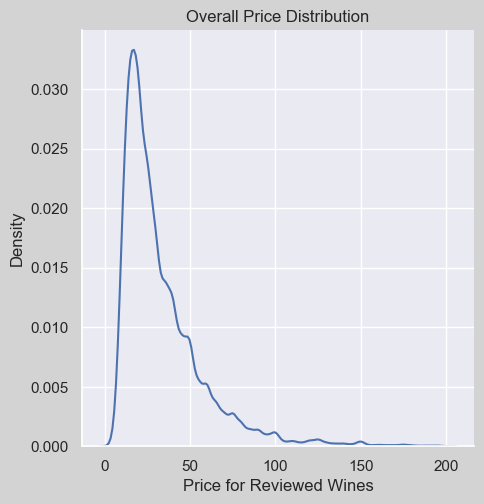

In [28]:
#plot overall distribution of price
sns.displot(points_price_df[points_price_df['price']<200].reset_index(), x='price', kind='kde')
plt.title("Overall Price Distribution")
plt.xlabel("Price for Reviewed Wines")

     country  count  min     max       mean  median        std
14    France  17776  5.0  3300.0  41.139120    25.0  73.769404
21     Italy  16914  5.0   900.0  39.663770    28.0  38.052479
30  Portugal   4875  5.0  1000.0  26.218256    16.0  41.175241
36     Spain   6573  4.0   770.0  28.215275    18.0  34.662397
39        US  54265  4.0  2013.0  36.573464    30.0  27.088857


Text(0.5, 12.44444444444443, 'Price for Reviewed Wines')

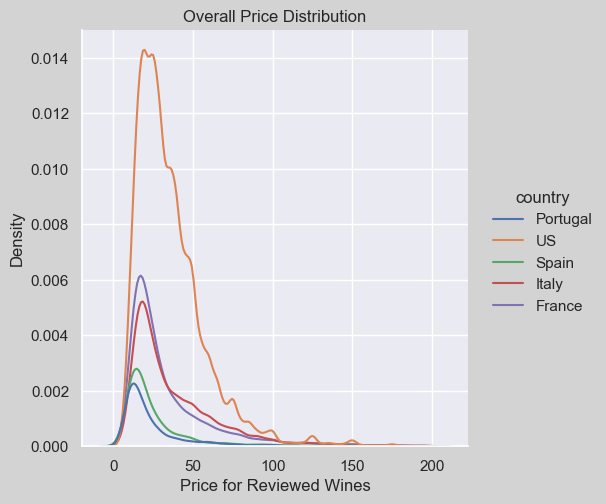

In [29]:
points_price_country_df = wine_table[['country', 'points', 'price']]
#restrict to top 5 countries
points_price_country_df = points_price_country_df[points_price_country_df['country'].str.contains('US|France|Spain|Italy|Portugal')]
#restrict to prices under $200
points_price_country_df = points_price_country_df[points_price_country_df['price']<200]
# mean prices
price_basic_stats_df = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_country')
print(price_basic_stats_df[price_basic_stats_df['country'].str.contains('US|France|Spain|Italy|Portugal')])

#points vs. price for top five countries that have the most reviews
points_price_us = points_price_country_df[points_price_country_df['country'] == 'US']
points_price_france = points_price_country_df[points_price_country_df['country'] == 'France']
points_price_spain = points_price_country_df[points_price_country_df['country'] == 'Spain']
points_price_italy = points_price_country_df[points_price_country_df['country'] == 'Italy']
points_price_portugal = points_price_country_df[points_price_country_df['country'] == 'Portugal']


#plot overall distribution of price
sns.displot(points_price_country_df, x='price', hue='country', kind='kde', )
plt.title("Overall Price Distribution")
plt.xlabel("Price for Reviewed Wines")


Text(0.5, 12.44444444444443, 'Price for Reviewed Wines ($)')

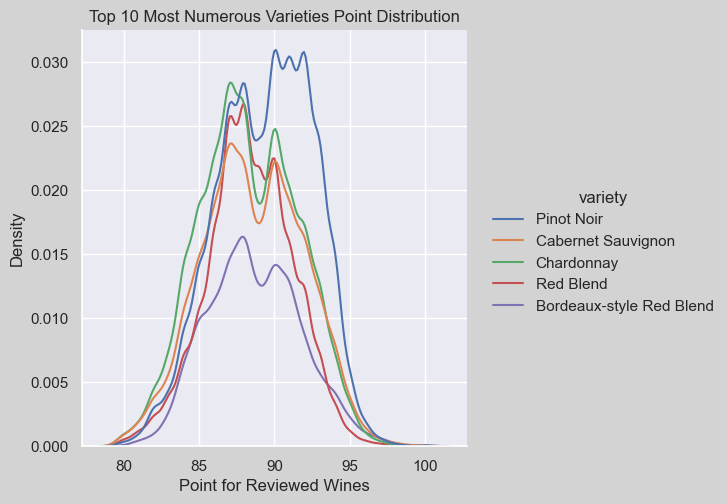

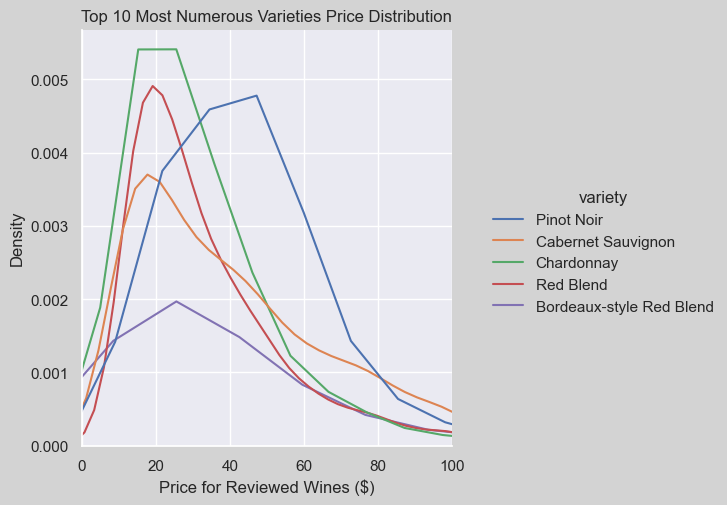

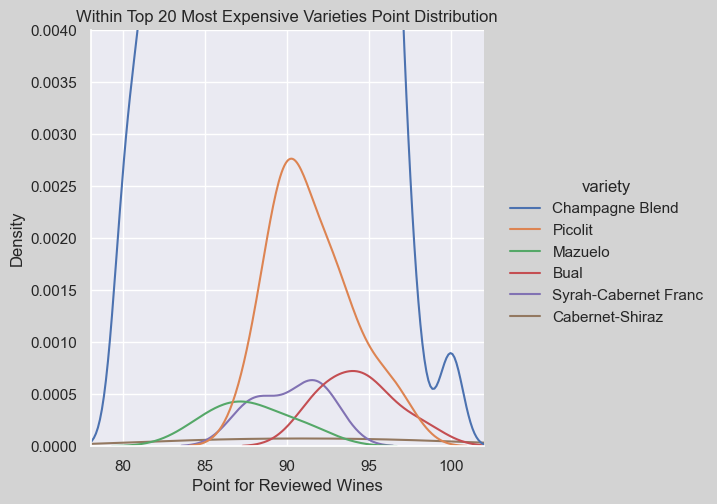

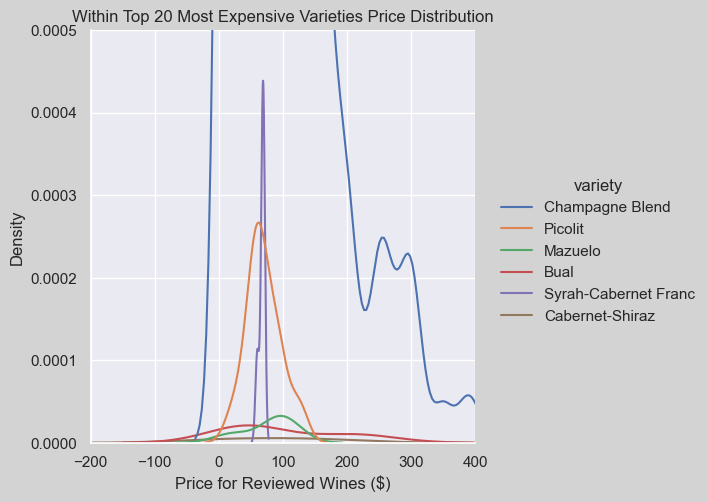

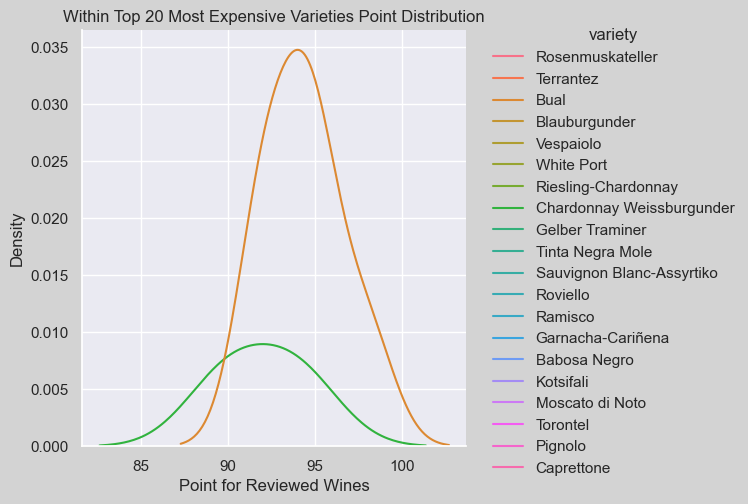

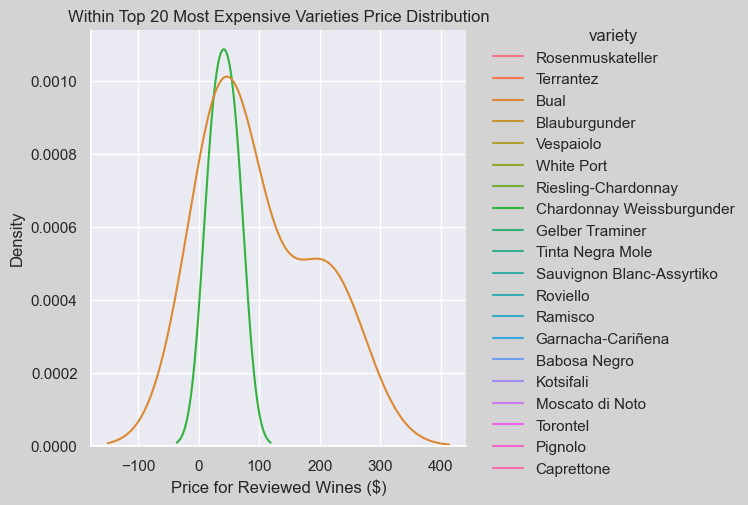

In [30]:
#top5 variety by count price and plot distributions
wine_table_top5count_variety = db_op.filter_top_n(cur, con, ['variety'], 'count', 5, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_variety')
#plot distribution of points for top 10 most numerous varieties
sns.displot(wine_table_top5count_variety, x='points', hue='variety', kind='kde', )
plt.title("Top 10 Most Numerous Varieties Point Distribution")
plt.xlabel("Point for Reviewed Wines")
#plot distribution of price for top 10 most numerous varieties
sns.displot(wine_table_top5count_variety, x='price', hue='variety', kind='kde', )
plt.title("Top 10 Most Numerous Varieties Price Distribution")
plt.xlabel("Price for Reviewed Wines ($)")
plt.xlim(0, 100)

#top5 variety by mean price and plot distributions
price_basic_stats_top_varieties = db_op.read_table(cur, con, 'price_basic_stats_grouped_by_variety')
price_basic_stats_variety_out_table = price_basic_stats_top_varieties.sort_values(by='mean', ascending=False)
price_basic_stats_variety_out_table.to_sql("price_basic_stats_grouped_by_variety_sorted_by_mean", con, if_exists='replace')
wine_table_top5count_variety = db_op.filter_top_n(cur, con, ['variety'], 'mean', 20, df=wine_table, tablename_to_measure_by='price_basic_stats_grouped_by_variety_sorted_by_mean')

#exclude 'Debit' wine variety, as has nulls
set_non_one_count_varieties_at_top = {'	Malbec-Cabernet', 'Champagne Blend', 'Bual', 'Cabernet-Shiraz', 'Mazuelo', 'Picolit', 'Syrah-Cabernet Franc'} #
wine_table_top5count_variety = wine_table_top5count_variety[wine_table_top5count_variety['variety'].isin(set_non_one_count_varieties_at_top)]
#plot distribution of points for top 10 most expensive varieties
sns.displot(wine_table_top5count_variety, x='points', hue='variety', kind='kde', )
plt.title("Within Top 20 Most Expensive Varieties Point Distribution")
plt.xlabel("Point for Reviewed Wines")
plt.xlim(78, 102)
plt.ylim(0,0.004)
#plot distribution of price for top 10 most expensive varieties
sns.displot(wine_table_top5count_variety, x='price', hue='variety', kind='kde', )
plt.title("Within Top 20 Most Expensive Varieties Price Distribution")
plt.xlabel("Price for Reviewed Wines ($)")
plt.xlim(-200, 400)
plt.ylim(0, 0.0005)

#plot distributions for top rated varieties
price_basic_stats_top_varieties = db_op.read_table(cur, con, 'points_basic_stats_grouped_by_variety')
price_basic_stats_variety_out_table = price_basic_stats_top_varieties.sort_values(by='mean', ascending=False)
price_basic_stats_variety_out_table.to_sql("points_basic_stats_grouped_by_variety_sorted_by_mean", con, if_exists='replace')
wine_table_top5points_variety = db_op.filter_top_n(cur, con, ['variety'], 'mean', 20, df=wine_table, tablename_to_measure_by='points_basic_stats_grouped_by_variety')
wine_table_top5points_variety = wine_table_top5points_variety[['variety', 'taster_name', 'points', 'price']] #.dropna()


#plot distribution of points for top 10 most highly-rated varieties
sns.displot(wine_table_top5points_variety, x='points', hue='variety', kind='kde', )
plt.title("Within Top 20 Most Expensive Varieties Point Distribution")
plt.xlabel("Point for Reviewed Wines")
#plot distribution of price for top 10 most highly-rated varieties
sns.displot(wine_table_top5points_variety, x='price', hue='variety', kind='kde', )
plt.title("Within Top 20 Most Expensive Varieties Price Distribution")
plt.xlabel("Price for Reviewed Wines ($)")

In [31]:
#all Bual reviews are by Roger Voss
# top 20 varieties by average point rating
top_points_varieties = set(
  {
    'Terrantez',
    'Gelber Traminer',
    'Bual',
    'Riesling-Chardonnay',
    'Roviello',
    'Garnacha-Cariñena',
    'Blauburgunder',
    'Ramisco',
    'Tinta Negra Mole',
    'White Port',
    'Vespaiolo',
    'Rosenmuskateller',
    'Kotsifali',
    'Sauvignon Blanc-Assyrtiko',
    'Moscato di Noto',
    'Babosa Negro',
    'Pignolo',
    'Caprettone',
    'Chardonnay Weissburgunder',
    'Torontel',
    'Centesimino'
  }
)
#only six tasters out of 19 total rated  (Roger voss,
# Anne Krebiehl MW,
# Anna Lee C. Iijima,
# Susan Kostrzewa,
# Kerin O’Keefe,
# Michael Schachner ) on average above 92 points for a given wine variety.
# Of these 27 total reviews, 5 were from tasters that did not include their name.
print(wine_table[wine_table['variety'].isin(top_points_varieties)][['variety', 'taster_name', 'points']])

                          variety         taster_name  points
24484            Rosenmuskateller          Roger Voss      92
29144                   Terrantez          Roger Voss      95
29152                        Bual          Roger Voss      95
31374               Blauburgunder    Anne Krebiehl MW      93
33551                        Bual          Roger Voss      98
42824                   Vespaiolo                None      92
45766                  White Port                None      92
47707         Riesling-Chardonnay  Anna Lee C. Iijima      94
61078   Chardonnay Weissburgunder                None      90
63769                        Bual          Roger Voss      92
68384                        Bual          Roger Voss      92
78025             Gelber Traminer    Anne Krebiehl MW      95
79609            Tinta Negra Mole          Roger Voss      92
80658   Sauvignon Blanc-Assyrtiko     Susan Kostrzewa      92
84050                    Roviello       Kerin O’Keefe      93
90803   

In [32]:
# Build Wine Glass Word Clouds with word frequencies from description column
#TAKES APPROX 9-14m runtime
adj_wine_table = TextFilter(wine_table)


key for row:  0
row:  taster_name                                                                    Anna Lee C. Iijima
description_processed_adjectives_dict_counts    {'savori': 75, 'dri': 53, 'thyme': 1, 'note': ...
Name: 0, dtype: object


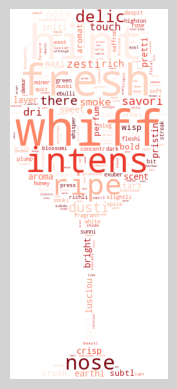

key for row:  1
row:  taster_name                                                                            Jim Gordon
description_processed_adjectives_dict_counts    {'deep': 67, 'color': 23, 'spicysmoki': 1, 'fl...
Name: 1, dtype: object


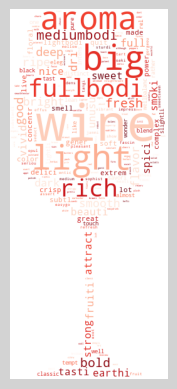

key for row:  2
row:  taster_name                                                                        Joe Czerwinski
description_processed_adjectives_dict_counts    {'mediumbodi': 135, 'chardonnay': 1, 'featur':...
Name: 2, dtype: object


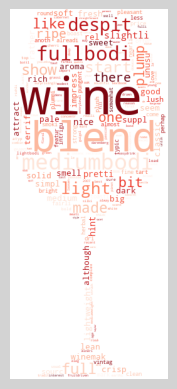

key for row:  3
row:  taster_name                                                                         Kerin O’Keefe
description_processed_adjectives_dict_counts    {'here': 265, 'bright': 118, 'inform': 24, 're...
Name: 3, dtype: object


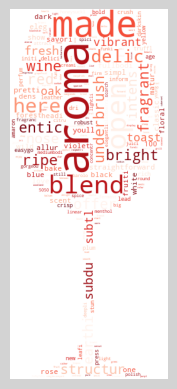

key for row:  4
row:  taster_name                                                                         Matt Kettmann
description_processed_adjectives_dict_counts    {'build': 4, '150': 1, 'year': 4, 'six': 3, 'g...
Name: 4, dtype: object


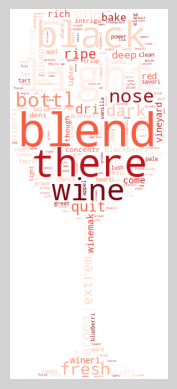

key for row:  5
row:  taster_name                                                                     Michael Schachner
description_processed_adjectives_dict_counts    {'blackberri': 95, 'raspberri': 70, 'aroma': 5...
Name: 5, dtype: object


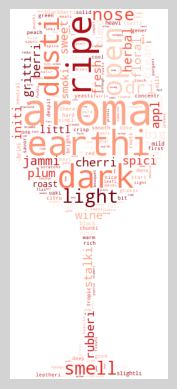

key for row:  6
row:  taster_name                                                                          Paul Gregutt
description_processed_adjectives_dict_counts    {'tart': 97, 'snappi': 2, 'flavor': 17, 'lime'...
Name: 6, dtype: object


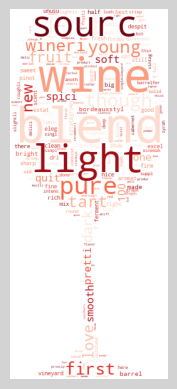

key for row:  7
row:  taster_name                                                                            Roger Voss
description_processed_adjectives_dict_counts    {'ripe': 1023, 'fruiti': 293, 'wine': 2899, 's...
Name: 7, dtype: object


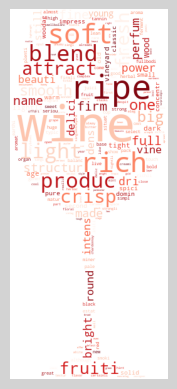

key for row:  8
row:  taster_name                                                                      Sean P. Sullivan
description_processed_adjectives_dict_counts    {'aroma': 841, 'cranberri': 4, 'barrel': 81, '...
Name: 8, dtype: object


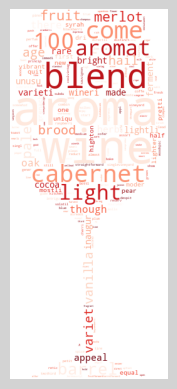

key for row:  9
row:  taster_name                                                                        Virginie Boone
description_processed_adjectives_dict_counts    {'soft': 125, 'suppl': 5, 'plum': 7, 'envelop'...
Name: 9, dtype: object


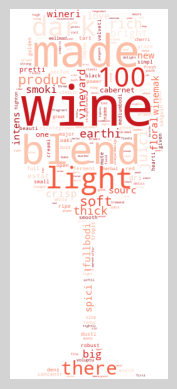

In [33]:
#plot word clouds for top10 tasters by count of taster name

adj_wine_table.produce_wine_word_clouds(
  cur,
  con,
  ['taster_name'],
  10,
  'count',
  tablename_to_measure_by='price_basic_stats_grouped_by_taster_name'
)

key for row:  0
row:  variety                                                                  Bordeaux-style Red Blend
description_processed_adjectives_dict_counts    {'fruiti': 76, 'lightli': 18, 'herbac': 16, 'f...
Name: 0, dtype: object


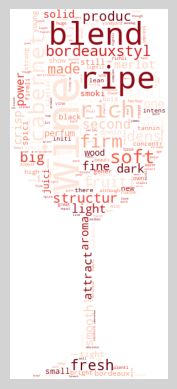

key for row:  1
row:  variety                                                                        Cabernet Sauvignon
description_processed_adjectives_dict_counts    {'soft': 170, 'suppl': 10, 'plum': 27, 'envelo...
Name: 1, dtype: object


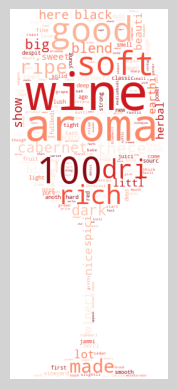

key for row:  2
row:  variety                                                                                Chardonnay
description_processed_adjectives_dict_counts    {'build': 3, '150': 1, 'year': 15, 'six': 2, '...
Name: 2, dtype: object


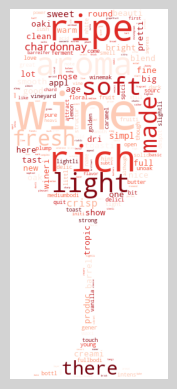

key for row:  3
row:  variety                                                                                    Merlot
description_processed_adjectives_dict_counts    {'wine': 131, 'geneseo': 1, 'district': 1, 'of...
Name: 3, dtype: object


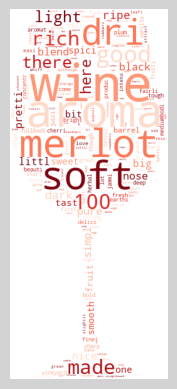

key for row:  4
row:  variety                                                                                Pinot Noir
description_processed_adjectives_dict_counts    {'much': 18, 'like': 22, 'regular': 2, 'bottl'...
Name: 4, dtype: object


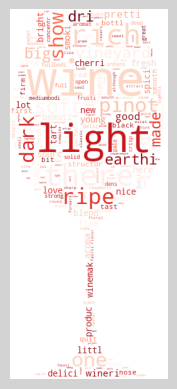

key for row:  5
row:  variety                                                                                 Red Blend
description_processed_adjectives_dict_counts    {'ripe': 170, 'aroma': 497, 'dark': 100, 'berr...
Name: 5, dtype: object


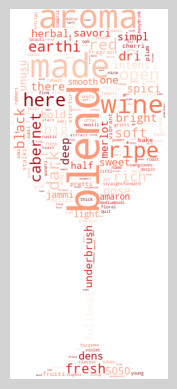

key for row:  6
row:  variety                                                                                  Riesling
description_processed_adjectives_dict_counts    {'pineappl': 2, 'rind': 1, 'lemon': 30, 'pith'...
Name: 6, dtype: object


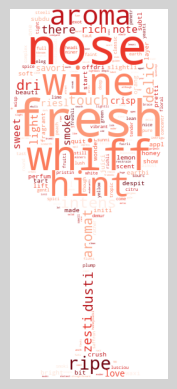

key for row:  7
row:  variety                                                                                      Rosé
description_processed_adjectives_dict_counts    {'pale': 133, 'copper': 3, 'hue': 1, 'wine': 2...
Name: 7, dtype: object


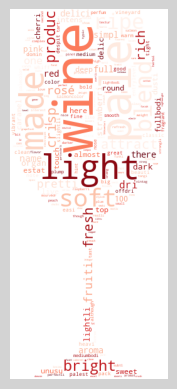

key for row:  8
row:  variety                                                                           Sauvignon Blanc
description_processed_adjectives_dict_counts    {'show': 26, 'tart': 11, 'green': 52, 'goosebe...
Name: 8, dtype: object


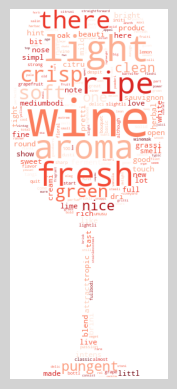

key for row:  9
row:  variety                                                                                     Syrah
description_processed_adjectives_dict_counts    {'bake': 10, 'red': 4, 'cherri': 12, 'crush': ...
Name: 9, dtype: object


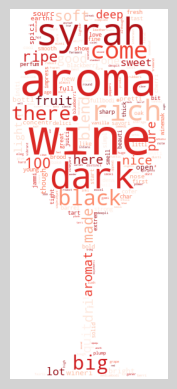

In [34]:
#by top 10 most numerous varieties
adj_wine_table.produce_wine_word_clouds(
  cur,
  con,
  ['variety'],
  10,
  'count',
  tablename_to_measure_by='price_basic_stats_grouped_by_variety'
)

key for row:  0
row:  country                                                                                    France
description_processed_adjectives_dict_counts    {'dri': 137, 'restrain': 14, 'wine': 2302, 'of...
Name: 0, dtype: object


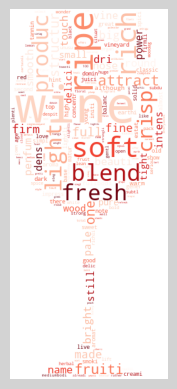

key for row:  1
row:  country                                                                                     Italy
description_processed_adjectives_dict_counts    {'here': 708, 'bright': 257, 'inform': 38, 're...
Name: 1, dtype: object


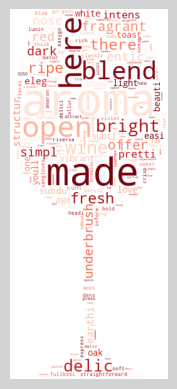

key for row:  2
row:  country                                                                                  Portugal
description_processed_adjectives_dict_counts    {'ripe': 237, 'fruiti': 76, 'wine': 615, 'smoo...
Name: 2, dtype: object


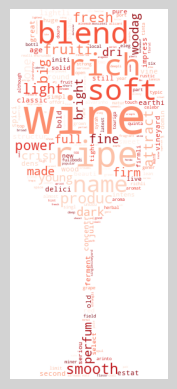

key for row:  3
row:  country                                                                                     Spain
description_processed_adjectives_dict_counts    {'blackberri': 39, 'raspberri': 36, 'aroma': 2...
Name: 3, dtype: object


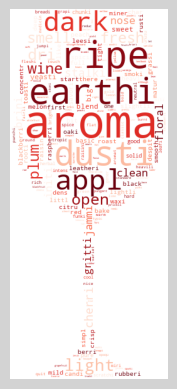

key for row:  4
row:  country                                                                                        US
description_processed_adjectives_dict_counts    {'tart': 191, 'snappi': 4, 'flavor': 127, 'lim...
Name: 4, dtype: object


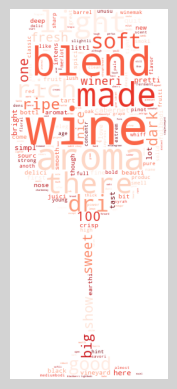

In [35]:
#by top 5 most numerous countries
adj_wine_table.produce_wine_word_clouds(
  cur,
  con,
  ['country'],
  5,
  'count',
  tablename_to_measure_by='price_basic_stats_grouped_by_country'
)

key for row:  0
row:  province                                                                                 Bordeaux
description_processed_adjectives_dict_counts    {'fruiti': 74, 'lightli': 17, 'herbac': 14, 'f...
Name: 0, dtype: object


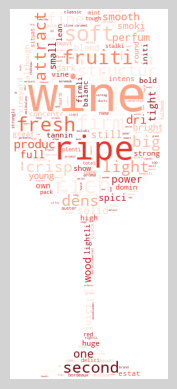

key for row:  1
row:  province                                                                                 Burgundy
description_processed_adjectives_dict_counts    {'warm': 31, '2015': 1, 'vintag': 4, 'soft': 1...
Name: 1, dtype: object


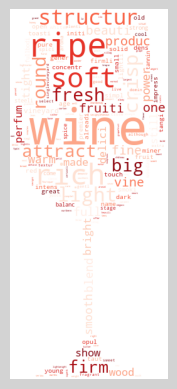

key for row:  2
row:  province                                                                               California
description_processed_adjectives_dict_counts    {'soft': 587, 'suppl': 14, 'plum': 24, 'envelo...
Name: 2, dtype: object


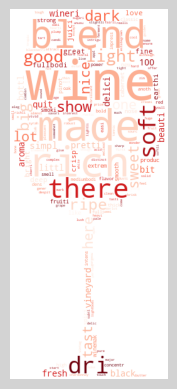

key for row:  3
row:  province                                                                         Mendoza Province
description_processed_adjectives_dict_counts    {'raw': 6, 'blackcherri': 1, 'aroma': 101, 'di...
Name: 3, dtype: object


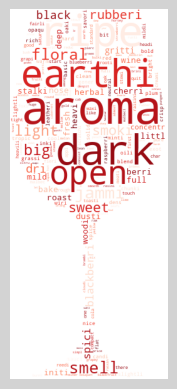

key for row:  4
row:  province                                                                                 New York
description_processed_adjectives_dict_counts    {'wisp': 13, 'brambl': 13, 'extend': 5, 'savor...
Name: 4, dtype: object


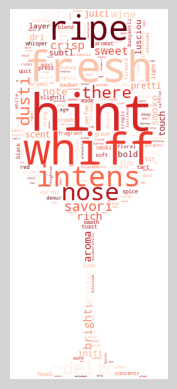

key for row:  5
row:  province                                                                           Northern Spain
description_processed_adjectives_dict_counts    {'blackberri': 26, 'raspberri': 25, 'aroma': 1...
Name: 5, dtype: object


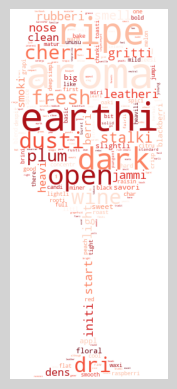

key for row:  6
row:  province                                                                                   Oregon
description_processed_adjectives_dict_counts    {'tart': 69, 'snappi': 2, 'flavor': 13, 'lime'...
Name: 6, dtype: object


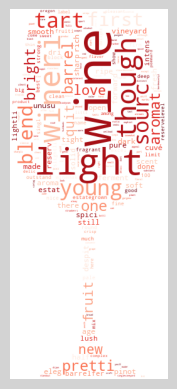

key for row:  7
row:  province                                                                                 Piedmont
description_processed_adjectives_dict_counts    {'slightli': 6, 'backward': 1, 'particularli':...
Name: 7, dtype: object


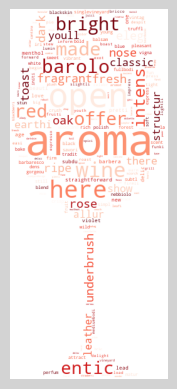

key for row:  8
row:  province                                                                                  Tuscany
description_processed_adjectives_dict_counts    {'subdu': 32, 'aroma': 532, 'french': 11, 'oak...
Name: 8, dtype: object


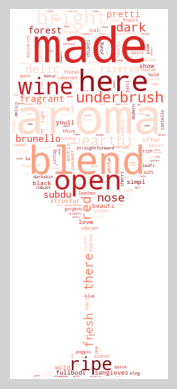

key for row:  9
row:  province                                                                               Washington
description_processed_adjectives_dict_counts    {'aroma': 789, 'cranberri': 4, 'barrel': 94, '...
Name: 9, dtype: object


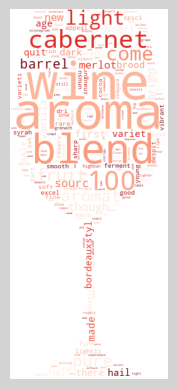

In [36]:
#by top 10 provinces by count
adj_wine_table.produce_wine_word_clouds(
  cur,
  con,
  ['province'],
  10,
  'count',
  tablename_to_measure_by='price_basic_stats_grouped_by_province'
)